# PREDICTION FOR THE 2022/2023 PREMIER LEAGUE WINNER 

##1. Defining the Question

### a) Specifying the Data Analytic Question

###b) Defining the Metric of Success

###c) Understanding the Context

###d) Recording the Experimental Data

###e) Data Relevance

##2. Reading the Data

### Importing Libraries and Reading of the Data Set

In [2]:
#Importing the Libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# let's create a function to read the data
def read_data(season):
    season18 = pd.read_csv('season-1718.csv')
    season19 = pd.read_csv('season-1819.csv')
    season20=pd.read_csv('season-1920.csv')
    season21=pd.read_csv('season-2021.csv')

    if season=='19':
        return season19
    elif season=='20':
        return season20
    elif season=='21':
        return season21
    elif season=='18':
        return season18
    else:
        print('Invalid season')

# let's print the 18 season data
season18=read_data('18')
print(season18.head())
# let's print the 19 season data
season19 = read_data('19')
print(season19.head())

# let's print the 20 season data
season20 = read_data('20')
print(season20.head())

# let's print the 21 season data
season21 = read_data('21')
print(season21.head())

  Div      Date        HomeTeam      AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  E0  11/08/17         Arsenal     Leicester     4     3   H     2     2   D   
1  E0  12/08/17        Brighton      Man City     0     2   A     0     0   D   
2  E0  12/08/17         Chelsea       Burnley     2     3   A     0     3   A   
3  E0  12/08/17  Crystal Palace  Huddersfield     0     3   A     0     2   A   
4  E0  12/08/17         Everton         Stoke     1     0   H     1     0   H   

   ... BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA   PSCH  PSCD  \
0  ...     2.32    21  -1.00     1.91     1.85     2.10     2.02   1.49  4.73   
1  ...     2.27    20   1.50     1.95     1.91     2.01     1.96  11.75  6.15   
2  ...     2.23    20  -1.75     2.03     1.97     1.95     1.90   1.33  5.40   
3  ...     1.72    18  -0.75     2.10     2.05     1.86     1.83   1.79  3.56   
4  ...     1.76    19  -0.75     1.94     1.90     2.01     1.98   1.82  3.49   

    PSCA  
0   7.25  
1   

In [3]:
# Checking the number of rows and columns
print(season18.shape)
print(season19.shape)
print(season20.shape)
print(season21.shape)

(380, 65)
(380, 62)
(380, 106)
(380, 106)


### Previewing The 2018 Season Data

In [4]:
# Previewing the first five records
season18.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


### Previewing The 2019 Season Data

In [5]:
# Previewing the first five records
season19.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


### Previewing The 2020 Season Data

In [6]:
# Previewing the first five records
season20.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


### Previewing The 2021 Season Data

In [7]:
# Previewing the first five records
season21.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


### Previewing The last 5 rows in the 2018 Season Data

In [8]:
# Previewing the last five records
season18.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
375,E0,13/05/18,Newcastle,Chelsea,3,0,H,1,0,H,...,2.01,21,1.00,1.90,1.83,2.11,2.03,4.85,3.72,1.80
376,E0,13/05/18,Southampton,Man City,0,1,A,0,0,D,...,2.49,20,1.25,2.01,1.95,1.97,1.91,6.32,4.78,1.51
377,E0,13/05/18,Swansea,Stoke,1,2,A,1,2,A,...,2.06,19,-0.50,1.94,1.88,2.03,1.98,2.08,3.56,3.82
378,E0,13/05/18,Tottenham,Leicester,5,4,H,1,2,A,...,2.84,20,-1.50,1.96,1.86,2.05,2.00,1.38,5.50,8.15
379,E0,13/05/18,West Ham,Everton,3,1,H,1,0,H,...,1.97,21,-0.25,2.09,2.03,1.88,1.84,2.35,3.40,3.28


### Previewing The last 5 rows in the 2019 Season Data

In [9]:
# Previewing the last five records
season19.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,2.31,22,-1.5,1.98,1.91,2.01,1.95,1.32,5.89,9.48
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,2.95,21,-2.0,2.52,2.32,1.72,1.64,1.30,6.06,9.71
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,2.29,22,-1.5,2.27,2.16,1.80,1.73,1.37,5.36,8.49
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,...,2.07,19,-0.5,2.13,2.08,1.85,1.80,1.91,3.81,4.15
379,E0,12/05/2019,Watford,West Ham,1,4,A,0,2,A,...,2.44,19,-0.5,2.25,2.19,1.78,1.72,2.11,3.86,3.41


### Previewing The last 5 rows in the 2020 Season Data

In [10]:
# Previewing the last five records
season20.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
375,E0,26/07/2020,16:00,Leicester,Man United,0,2,A,0,0,...,2.03,0.50,1.89,2.01,1.88,2.05,1.94,2.05,1.86,2.02
376,E0,26/07/2020,16:00,Man City,Norwich,5,0,H,2,0,...,5.77,-3.75,2.03,1.87,2.01,1.88,2.06,1.88,2.02,1.84
377,E0,26/07/2020,16:00,Newcastle,Liverpool,1,3,A,1,1,...,2.40,1.00,1.94,1.96,1.95,1.97,2.03,2.00,1.95,1.92
378,E0,26/07/2020,16:00,Southampton,Sheffield United,3,1,H,0,1,...,2.01,-0.50,1.97,1.93,2.00,1.93,2.03,1.96,1.98,1.89
379,E0,26/07/2020,16:00,West Ham,Aston Villa,1,1,D,0,0,...,2.03,0.00,1.93,1.97,1.95,1.98,1.99,2.00,1.93,1.95


### Previewing The last 5 rows in the 2021 Season Data

In [11]:
# Previewing the last five records
season21.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89
379,E0,23/05/2021,16:00,Wolves,Man United,1,2,A,1,2,...,1.62,-0.25,2.04,1.86,2.10,1.84,2.10,1.94,2.00,1.88


### Checking for appropriate Data Types in the 2018 Season Data Set

In [12]:
# Checking all the columns have the appropriate Datatype
season18.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
             ...   
BbMxAHA     float64
BbAvAHA     float64
PSCH        float64
PSCD        float64
PSCA        float64
Length: 65, dtype: object

### Checking for appropriate Data Types in the 2019 Season Data Set

In [13]:
# Checking all the columns have the appropriate Datatype
season19.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
             ...   
BbMxAHA     float64
BbAvAHA     float64
PSCH        float64
PSCD        float64
PSCA        float64
Length: 62, dtype: object

### Checking for appropriate Data Types in the 2020 Season Data Set

In [14]:
# Checking all the columns have the appropriate Datatype
season20.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

### Checking for appropriate Data Types in the 2021 Season Data Set

In [15]:
# Checking all the columns have the appropriate Datatype
season21.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

### Checking for appropriate Data Info in the 2018 Season Data Set

In [16]:
# Checking the information about the Dataset
season18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

### Checking for appropriate Data Info in the 2019 Season Data Set

In [17]:
# Checking the information about the Dataset
season19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

### Checking for appropriate Data Info in the 2020 Season Data Set

In [18]:
# Checking the information about the Dataset
season20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


### Checking for appropriate Data Info in the 2021 Season Data Set

In [19]:
# Checking the information about the Dataset
season21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


### Describing Our 2018 Data Set

In [20]:
# Checking the statistical information of the numerical values in our Dataset
season18.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.531579,1.147368,0.607895,0.515789,13.584211,10.855263,4.626316,3.763158,10.218421,10.478947,...,2.031263,19.350000,-0.334868,2.002763,1.947211,1.986368,1.933316,3.186447,4.493974,5.621763
std,1.340087,1.177793,0.793403,0.756511,5.771439,4.858700,2.706845,2.317015,3.256360,3.336388,...,0.443007,1.976411,0.995969,0.149080,0.140424,0.147712,0.138534,2.569665,1.844959,5.349603
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,...,1.400000,14.000000,-2.750000,1.620000,1.590000,1.680000,1.640000,1.080000,2.890000,1.190000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,8.000000,8.000000,...,1.690000,19.000000,-0.750000,1.900000,1.850000,1.880000,1.830000,1.717500,3.320000,2.450000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.500000,4.000000,3.500000,10.000000,10.000000,...,1.930000,19.000000,-0.250000,2.000000,1.940000,1.970000,1.925000,2.305000,3.695000,3.540000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,12.000000,13.000000,...,2.270000,21.000000,0.250000,2.100000,2.040000,2.080000,2.030000,3.225000,5.130000,5.515000
max,7.000000,6.000000,4.000000,3.000000,35.000000,30.000000,15.000000,14.000000,19.000000,26.000000,...,4.070000,24.000000,2.000000,2.410000,2.340000,2.520000,2.430000,17.000000,15.000000,28.500000


### Describing Our 2019 Data Set

In [21]:
# Checking the statistical information of the numerical values in our Dataset
season19.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,2.126895,20.736842,-0.327632,2.025184,1.962447,2.002395,1.942053,3.332974,4.576342,5.620132
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,0.467750,1.571249,1.056248,0.247373,0.230633,0.226581,0.215442,3.137394,2.019487,5.779454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.450000,17.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.797500,20.000000,-1.000000,1.830000,1.787500,1.817500,1.770000,1.595000,3.410000,2.335000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,2.030000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.350000,3.765000,3.415000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,2.330000,22.000000,0.250000,2.190000,2.120000,2.152500,2.092500,3.380000,4.842500,6.565000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,4.170000,24.000000,2.500000,3.150000,3.010000,2.770000,2.650000,24.770000,14.920000,36.050000


### Describing Our 2020 Data Set

In [22]:
# Checking the statistical information of the numerical values in our Dataset
season20.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.515789,1.205263,0.700000,0.550000,13.323684,11.400000,4.555263,3.994737,10.484211,10.981579,...,2.174132,-0.276974,1.944474,1.960526,1.961053,1.972947,2.013368,2.026921,1.936079,1.950842
std,1.248646,1.200252,0.886427,0.758505,5.417938,5.255278,2.520543,2.489020,3.582759,3.713653,...,0.544434,0.978376,0.129753,0.101650,0.140680,0.105627,0.138995,0.110237,0.127354,0.098890
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.450000,-3.750000,1.670000,1.270000,1.710000,1.300000,1.800000,1.300000,1.700000,1.280000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.800000,-0.750000,1.870000,1.890000,1.880000,1.890000,1.930000,1.950000,1.860000,1.880000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,10.000000,11.000000,...,2.040000,-0.250000,1.950000,1.970000,1.960000,1.970000,2.000000,2.030000,1.930000,1.950000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,13.000000,13.000000,...,2.400000,0.250000,2.020000,2.040000,2.032500,2.050000,2.070000,2.100000,2.000000,2.020000
max,8.000000,9.000000,5.000000,5.000000,31.000000,26.000000,13.000000,15.000000,23.000000,24.000000,...,5.770000,3.000000,3.550000,2.200000,3.930000,2.290000,3.950000,2.300000,3.660000,2.240000


### Describing Our 2021 Data Set

In [23]:
# Checking the statistical information of the numerical values in our Dataset
season21.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.352632,1.342105,0.665789,0.605263,12.815789,11.363158,4.544737,4.084211,11.223684,10.550000,...,2.062421,-0.161842,1.950553,1.961211,1.962368,1.968079,2.009605,2.024868,1.935605,1.948079
std,1.320378,1.257722,0.825956,0.806945,5.490482,4.880602,2.594005,2.258555,3.438102,3.474768,...,0.380395,0.861898,0.101861,0.100985,0.105253,0.102970,0.105343,0.105101,0.095348,0.094764
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,1.390000,-2.500000,1.700000,1.580000,1.740000,1.560000,1.810000,1.640000,1.740000,1.590000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,3.000000,9.000000,8.000000,...,1.790000,-0.750000,1.870000,1.880000,1.880000,1.880000,1.910000,1.930000,1.860000,1.860000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,11.000000,4.000000,4.000000,11.000000,10.000000,...,2.000000,-0.250000,1.955000,1.970000,1.950000,1.970000,2.010000,2.030000,1.930000,1.950000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.250000,6.000000,5.250000,13.000000,13.000000,...,2.260000,0.250000,2.040000,2.050000,2.050000,2.060000,2.090000,2.110000,2.020000,2.030000
max,9.000000,7.000000,4.000000,4.000000,29.000000,28.000000,14.000000,14.000000,23.000000,21.000000,...,3.550000,2.250000,2.350000,2.160000,2.590000,2.230000,2.650000,2.400000,2.450000,2.180000


## 4. TIDYING THE DATASET

In [24]:
# let's drop the betting columns from the dataset
# we will drop fro column number 23 to the end

# a function to drop the betting columns
def drop_betting_columns(season):
    season.drop(season.columns[23:], axis=1, inplace=True)
    return season

season18=drop_betting_columns(season18)
season19=drop_betting_columns(season19)
season20=drop_betting_columns(season20)
season21=drop_betting_columns(season21)

The data had columns containing Betting information which was not useful for the analysis hence the need to drop that data from the dataset.

### Checking for Outliers and Plotting of the Box Plots

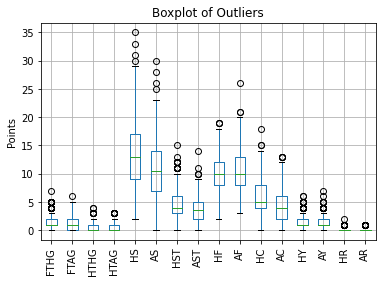

In [25]:
# let's check for outliers in the dataset using boxplot and give it a title and label

# let's create a function to plot the boxplot
def plot_boxplot(data,title,label):
    data.boxplot()
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Points')
    plt.show()

plot_boxplot(season18, 'Boxplot of Outliers', 'Points')


The Box Plot above shows a Data Set with interesting outliers. However, these will not be dropped as they do make sense realistically from a football point of view, despite the statistical need to clean the outliers

### Season 2019 Data Set Box Plot

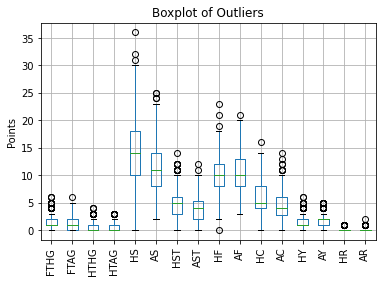

In [26]:
plot_boxplot(season19, 'Boxplot of Outliers', 'Points')

The Box Plot above shows a Data Set with interesting outliers. However, these will not be dropped as they do make sense realistically from a football point of view, despite the statistical need to clean the outliers

### Season 2020 Box Plot

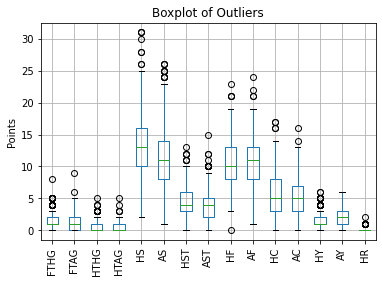

In [27]:
plot_boxplot(season20, 'Boxplot of Outliers', 'Points')

The Box Plot above shows a Data Set with interesting outliers. However, these will not be dropped as they do make sense realistically from a football point of view, despite the statistical need to clean the outliers

### Season 2021 Data Set Box Plot

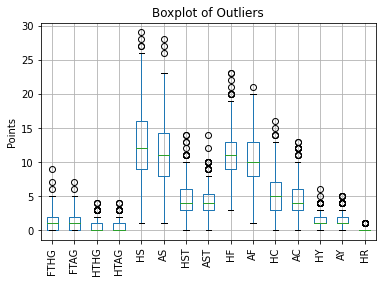

In [28]:
plot_boxplot(season21, 'Boxplot of Outliers', 'Points')

The Box Plot above shows a Data Set with interesting outliers. However, these will not be dropped as they do make sense realistically from a football point of view, despite the statistical need to clean the outliers

### Checking Anomalies in the Data Set

In [29]:
# anomolies in the dataset

# let's create a function to check for duplicate values
def check_duplicate_values(data):
    print(data.duplicated().sum())

print(check_duplicate_values(season18))
print(check_duplicate_values(season19))
print(check_duplicate_values(season20))
print(check_duplicate_values(season21))

0
None
0
None
0
None
0
None


All the Data Sets do not have any duplicate Values

### Check for Missing Vslues

In [30]:
# let's check for missing data in the dataset
print(season18.isnull().sum().any())
print(season19.isnull().sum().any())
print(season20.isnull().sum().any())
print(season21.isnull().sum().any())

False
False
False
False


The Data Set does not have any missing values reported in the Data Set

### Check for Null Values in the Data Set

In [31]:
# let's check for any entry that's not a string or an integer in the dataset
print(season18.select_dtypes(include=['object']).isnull().sum().any())
print(season19.select_dtypes(include=['object']).isnull().sum().any())
print(season20.select_dtypes(include=['object']).isnull().sum().any())
print(season21.select_dtypes(include=['object']).isnull().sum().any())


False
False
False
False


The Data Set Does not have any Null Values

## 5. Exploratory Data Analysis

#### a) Univariate Analysis

In [32]:
season18.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,10,3,9,12,9,4,0,1,0,0
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,2,4,6,9,3,10,0,2,0,0
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,6,5,16,11,8,5,3,3,2,0
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,4,6,7,19,12,9,1,3,0,0
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,4,1,13,10,6,7,1,1,0,0
5,E0,12/08/17,Southampton,Swansea,0,0,D,0,0,D,...,2,0,10,13,13,0,2,1,0,0
6,E0,12/08/17,Watford,Liverpool,3,3,D,2,1,H,...,4,5,14,8,3,3,0,3,0,0
7,E0,12/08/17,West Brom,Bournemouth,1,0,H,1,0,H,...,6,2,15,3,8,2,3,1,0,0
8,E0,13/08/17,Man United,West Ham,4,0,H,1,0,H,...,6,1,19,7,11,1,2,2,0,0
9,E0,13/08/17,Newcastle,Tottenham,0,2,A,0,0,D,...,3,6,6,10,5,7,1,2,1,0


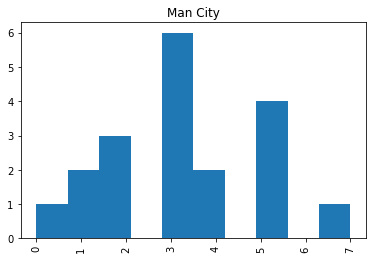

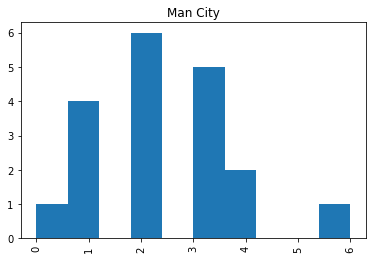

In [33]:
# let's create a function that will plot the histogram of the total goals scored 
# by Manchester City as the home team for each season

def plot_histogram(season):
    Manchester1 = season[season['HomeTeam']=='Man City']
    Manchester2 = season[season['AwayTeam']=='Man City']
    Manchester1.hist(column='FTHG', by='HomeTeam')
    Manchester2.hist(column='FTAG', by='AwayTeam')

plot_histogram(season18)

The Bar Plots above show the number of goals scored by Manchester City Football Team and on what frequency those goals were scored during the 2018 season. The Charts present Goals scored during Home Games and The away games.

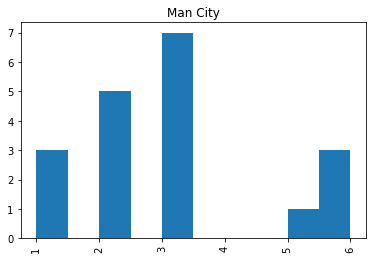

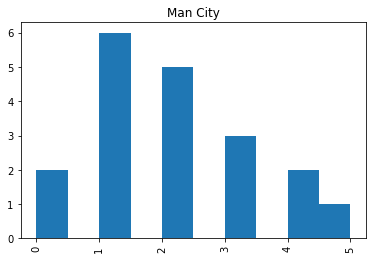

In [34]:
plot_histogram(season19)

The Bar Plots above show the number of goals scored by Manchester City Football Team and on what frequency those goals were scored during the 2019 season. The Charts present Goals scored during Home Games and The away games.

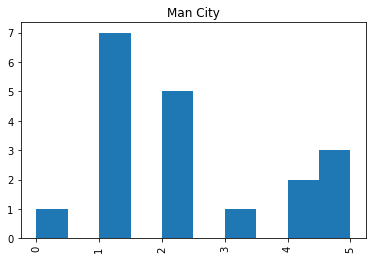

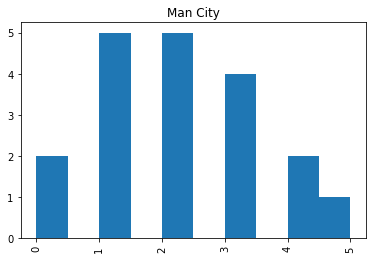

In [35]:
plot_histogram(season21)

The Bar Plots above show the number of goals scored by Manchester City Football Team and on what frequency those goals were scored during the 2020 season. The Charts present Goals scored during Home Games and The away games.

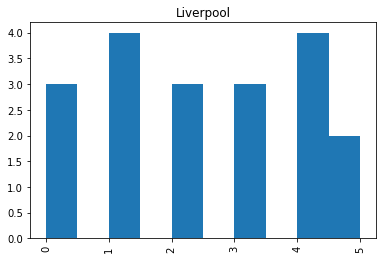

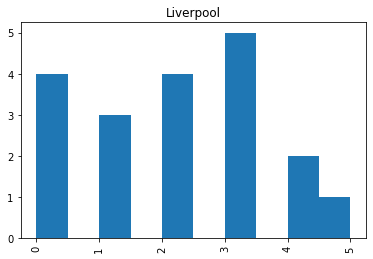

In [36]:
# for liverpool
def plot_histogram(season):
    Manchester1 = season[season['HomeTeam']=='Liverpool']
    Manchester2 = season[season['AwayTeam']=='Liverpool']
    Manchester1.hist(column='FTHG', by='HomeTeam')
    Manchester2.hist(column='FTAG', by='AwayTeam')

plot_histogram(season18)

The Bar Plots above show the number of goals scored by Liverpool Football Team and on what frequency those goals were scored during the 2018 season. The Charts present Goals scored during Home Games and The away games.

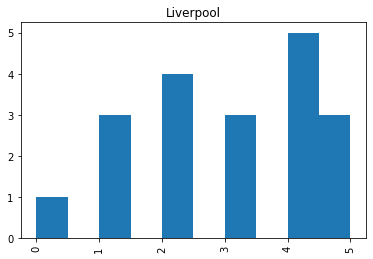

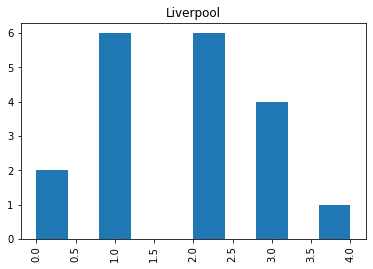

In [37]:
plot_histogram(season19)

The Bar Plots above show the number of goals scored by Liverpool Football Team and on what frequency those goals were scored during the 2019 season. The Charts present Goals scored during Home Games and The away games.

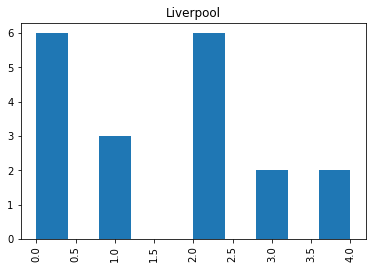

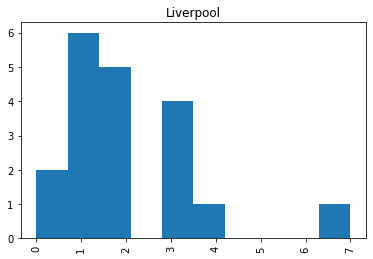

In [38]:
plot_histogram(season21)

The Bar Plots above show the number of goals scored by Liverpool Football Team and on what frequency those goals were scored during the 2021 season. The Charts present Goals scored during Home Games and The away games.

<AxesSubplot:xlabel='HomeTeam'>

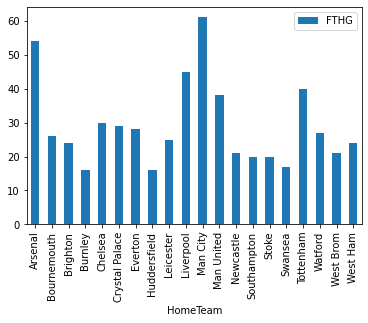

In [39]:
# stacked bar chart
season18.groupby('HomeTeam').agg({'FTHG':'sum'}).plot.bar(stacked=True)

The stacked bar chart above shows the sum of all the goals scored by the Teams in the League. These goals were scored by the respective teams playing at their home grounds.

### Bivariate Analysis

<AxesSubplot:title={'center':'\nCorrelation Matrix Of the Variables and Columns in the Season 2018 Data Set'}>

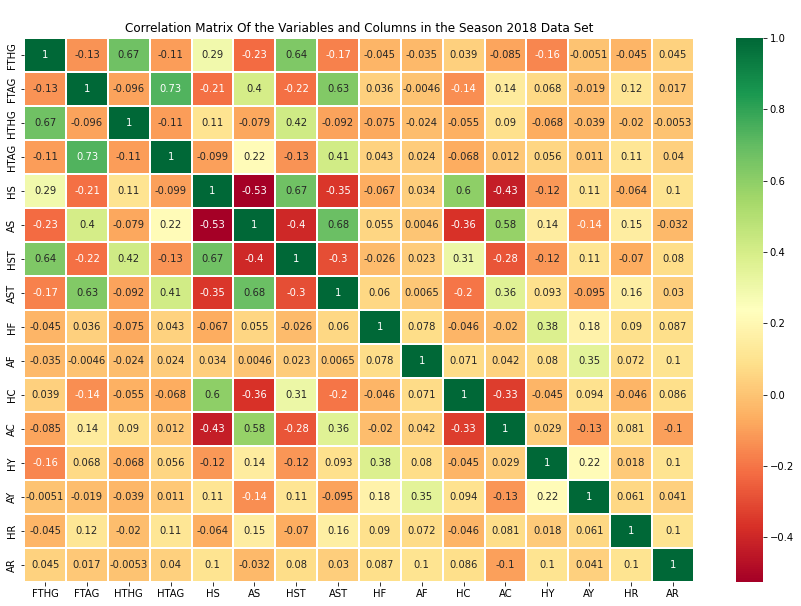

In [44]:
# let's use a heatmap to plot the correlation between the features

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("\nCorrelation Matrix Of the Variables and Columns in the Season 2018 Data Set")

#create seaborn heatmap
sns.heatmap(season18.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


The correlation Matrix shows some ntersting results. It is also important to note that the matrix represents data that is indipendently collected and does not necessarily have any strong relationship between the variables.

I'll use two or three relationships to derive insights from the matrix.

Insights:
1. FTHG & FTAG: The relationship on these two variables is low as it is represented by - 0.13 as its coeffecient. This negative low relationship means that the twi variables do not or have a low chance of affecting the outcome of the other.

2. FTAG & HTAG on the other hand have a 0.73 coefficient hence stating that the relationship is postive and strong hence suggesting that one occurance of theese variabes could affect the other one.

### Assigning the Teams with points
- The Team Will now group the Teams accross the various seasons with their appropriate points
- The Teams will be sorted in ascending order paying attention to the number of points scored in the season as a merit fucnction to determins the winner prediction.

In [ ]:

# creating a list to get the points

season18.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [ ]:
list(season18.columns.values.tolist())

['Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'Referee',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR']

In [ ]:
# let's drop some of the columns

season18.drop(['Div', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'], axis=1, inplace=True)

season18.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,11/08/17,Arsenal,Leicester,4,3,H
1,12/08/17,Brighton,Man City,0,2,A
2,12/08/17,Chelsea,Burnley,2,3,A
3,12/08/17,Crystal Palace,Huddersfield,0,3,A
4,12/08/17,Everton,Stoke,1,0,H


In [ ]:
season18['Date'] = pd.to_datetime(season18['Date'], dayfirst=True).dt.strftime('%m-%d-%Y')
season18.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,08-11-2017,Arsenal,Leicester,4,3,H
1,08-12-2017,Brighton,Man City,0,2,A
2,08-12-2017,Chelsea,Burnley,2,3,A
3,08-12-2017,Crystal Palace,Huddersfield,0,3,A
4,08-12-2017,Everton,Stoke,1,0,H


In [ ]:
season18['HomeTeam'].unique()

array(['Arsenal', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton',
       'Southampton', 'Watford', 'West Brom', 'Man United', 'Newcastle',
       'Bournemouth', 'Burnley', 'Leicester', 'Liverpool', 'Stoke',
       'Swansea', 'Huddersfield', 'Tottenham', 'Man City', 'West Ham'],
      dtype=object)

In [ ]:
df_ManCity = season18.loc[(season18['HomeTeam'] == 'Man City') | (season18['AwayTeam'] == 'Man City')]

df_ManCity.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
1,08-12-2017,Brighton,Man City,0,2,A
19,08-21-2017,Man City,Everton,1,1,D
20,08-26-2017,Bournemouth,Man City,1,2,A
34,09-09-2017,Man City,Liverpool,5,0,H
46,09-16-2017,Watford,Man City,0,6,A


We will now assign points the the various Match Outcomes.

1. H (Home Team Win): 3 points
2. A (Away Team Win): 3 points
3. D (Draw) : 1 Point

In [ ]:
df_ManCity.loc[(df_ManCity['HomeTeam'] == 'Man City') &
                (df_ManCity['FTR'] == 'H'), 'Points'] = 3

df_ManCity.loc[(df_ManCity['AwayTeam'] == 'Man City') &
                (df_ManCity['FTR'] == 'A'), 'Points'] = 3

df_ManCity.loc[(df_ManCity['HomeTeam'] == 'Man City') &
                (df_ManCity['FTR'] == 'A'), 'Points'] = 0

df_ManCity.loc[(df_ManCity['AwayTeam'] == 'Man City') &
                (df_ManCity['FTR'] == 'H'), 'Points'] = 0

df_ManCity.loc[(df_ManCity['HomeTeam'] == 'Man City') &
                (df_ManCity['FTR'] == 'D'), 'Points'] = 1

df_ManCity.loc[(df_ManCity['AwayTeam'] == 'Man City') &
                (df_ManCity['FTR'] == 'D'), 'Points'] = 1

df_ManCity

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Points
1,08-12-2017,Brighton,Man City,0,2,A,3.0
19,08-21-2017,Man City,Everton,1,1,D,1.0
20,08-26-2017,Bournemouth,Man City,1,2,A,3.0
34,09-09-2017,Man City,Liverpool,5,0,H,3.0
46,09-16-2017,Watford,Man City,0,6,A,3.0
53,09-23-2017,Man City,Crystal Palace,5,0,H,3.0
61,09-30-2017,Chelsea,Man City,0,1,A,3.0
73,10-14-2017,Man City,Stoke,7,2,H,3.0
83,10-21-2017,Man City,Burnley,3,0,H,3.0
96,10-28-2017,West Brom,Man City,2,3,A,3.0


The Output Above shows the Match Outcome of all the Teams Grouped Based On the Points Acquired

In [ ]:
man_city_points = df_ManCity['Points'].sum()
man_city_points

100.0

Defining Of the Teams as Variables, thus ensuring that they are well represented as both an Away Team and Home Team

In [ ]:
df_tottenham= season18.loc[(season18 [ 'HomeTeam'] == 'Tottenham') | (season18['AwayTeam'] == 'Tottenham')]
df_bourn = season18.loc[(season18['HomeTeam'] == 'Bournemouth') | (season18['AwayTeam']== 'Bournemouth')] 
df_cp = season18.loc[(season18['HomeTeam'] == 'Crystal Palace') | (season18['AwayTeam'] == 'Crystal Palace')]
df_liverpool = season18.loc[(season18['HomeTeam'] == 'Liverpool') | (season18['AwayTeam'] == 'Liverpool')] 
df_wh = season18.loc [(season18['HomeTeam'] == 'West Ham') | (season18['AwayTeam'] == 'West Ham')]
df_wb = season18.loc[(season18 ['HomeTeam'] == 'West Brom ') | (season18['AwayTeam'] == 'West Brom')] 
df_brighton = season18.loc[(season18['HomeTeam'] == 'Brighton') | (season18['AwayTeam' ] == 'Brighton')]
df_watford = season18.loc [(season18['HomeTeam'] == 'Watford') | (season18['AwayTeam'] == 'Watford')]
df_everton = season18.loc [(season18 ['HomeTeam'] == 'Everton') | (season18['AwayTeam'] == 'Everton')] 
df_hud = season18.loc[(season18['HomeTeam'] == 'Huddersfield') | (season18['AwayTeam'] == 'Huddersfield')]
df_manu = season18.loc[(season18['HomeTeam'] == 'Man United') | (season18['AwayTeam'] == 'Man United')]
df_arsenal = season18.loc[(season18['HomeTeam'] == 'Arsenal') | (season18['AwayTeam'] == 'Arsenal')]
df_soton = season18.loc[(season18['HomeTeam'] == 'Southampton') | (season18['AwayTeam'] == 'Southampton')]
df_newcastle = season18.loc[(season18['HomeTeam' ] == 'Newcastle') | (season18['AwayTeam'] == 'Newcastle')] 
df_chelsea = season18.loc[(season18['HomeTeam'] == 'Chelsea') | (season18['AwayTeam'] == 'Chelsea')]
df_leicester = season18.loc[(season18['HomeTeam'] == 'Leicester') | (season18['AwayTeam'] == 'Leicester')]
df_stoke = season18.loc[(season18['HomeTeam'] == 'Stoke') | (season18['AwayTeam'] == 'Stoke')] 
df_sw = season18.loc[(season18['HomeTeam'] == 'Swansea') | (season18['AwayTeam'] == 'Swansea')]
df_burnley = season18.loc[(season18['HomeTeam' ] == 'Burnley') | (season18['AwayTeam'] == 'Burnley')]


In [ ]:
df_cp.loc[(df_cp['HomeTeam'] == 'Crystal Palace') &
(df_cp['FTR'] == 'H'), 'Points'] = 3
df_cp.loc[(df_cp['AwayTeam'] == 'Crystal Palace') &
(df_cp['FTR'] == 'A'), 'Points'] = 3
df_cp.loc[(df_cp['HomeTeam'] == 'Crystal Palace') &
(df_cp['FTR'] == 'A'), 'Points'] = 0
df_cp.loc[(df_cp['AwayTeam'] == 'Crystal Palace') &
(df_cp['FTR'] == 'H'), 'Points'] = 0
df_cp.loc[(df_cp['HomeTeam'] == 'Crystal Palace') &
(df_cp['FTR'] == 'D'), 'Points'] = 1
df_cp.loc[(df_cp['AwayTeam'] == 'Crystal Palace') &
(df_cp['FTR'] == 'D'), 'Points'] = 1
cppoints = df_cp['Points'].sum()


df_liverpool.loc[(df_liverpool['HomeTeam'] == 'Liverpool') &
(df_liverpool['FTR'] == 'H'), 'Points'] = 3
df_liverpool.loc[(df_liverpool['AwayTeam'] == 'Liverpool') &
(df_liverpool['FTR'] == 'A'), 'Points'] = 3
df_liverpool.loc[(df_liverpool['HomeTeam'] == 'Liverpool') &
(df_liverpool['FTR'] == 'A'), 'Points'] = 0
df_liverpool.loc[(df_liverpool['AwayTeam'] == 'Liverpool') &
(df_liverpool['FTR'] == 'H'), 'Points'] = 0
df_liverpool.loc[(df_liverpool['HomeTeam'] == 'Liverpool') &
(df_liverpool['FTR'] == 'D'), 'Points'] = 1
df_liverpool.loc[(df_liverpool['AwayTeam'] == 'Liverpool') &
(df_liverpool['FTR'] == 'D'), 'Points'] = 1
liverpoolpoints = df_liverpool['Points'].sum()


df_wh.loc[(df_wh['HomeTeam'] == 'West Ham') &
(df_wh['FTR'] == 'H'), 'Points'] = 3
df_wh.loc[(df_wh['AwayTeam'] == 'West Ham') &
(df_wh['FTR'] == 'A'), 'Points'] = 3
df_wh.loc[(df_wh['HomeTeam'] == 'West Ham') &
(df_wh['FTR'] == 'A'), 'Points'] = 0
df_wh.loc[(df_wh['AwayTeam'] == 'West Ham') &
(df_wh['FTR'] == 'H'), 'Points'] = 0
df_wh.loc[(df_wh['HomeTeam'] == 'West Ham') &
(df_wh['FTR'] == 'D'), 'Points'] = 1
df_wh.loc[(df_wh['AwayTeam'] == 'West Ham') &
(df_wh['FTR'] == 'D'), 'Points'] = 1
whpoints = df_wh['Points'].sum()


df_wb.loc[(df_wb['HomeTeam'] == 'West Brom') &
(df_wb['FTR'] == 'H'), 'Points'] = 3
df_wb.loc[(df_wb['AwayTeam'] == 'West Brom') &
(df_wb['FTR'] == 'A'), 'Points'] = 3
df_wb.loc[(df_wb['HomeTeam'] == 'West Brom') &
(df_wb['FTR'] == 'A'), 'Points'] = 0
df_wb.loc[(df_wb['AwayTeam'] == 'West Brom') &
(df_wb['FTR'] == 'H'), 'Points'] = 0
df_wb.loc[(df_wb['HomeTeam'] == 'West Brom') &
(df_wb['FTR'] == 'D'), 'Points'] = 1
df_wb.loc[(df_wb['AwayTeam'] == 'West Brom') &
(df_wb['FTR'] == 'D'), 'Points'] = 1
wbpoints = df_wb['Points'].sum()


df_tottenham.loc[(df_tottenham['HomeTeam'] == 'Tottenham') &
(df_tottenham['FTR'] == 'H'), 'Points'] = 3
df_tottenham.loc[(df_tottenham['AwayTeam'] == 'Tottenham') &
(df_tottenham['FTR'] == 'A'), 'Points'] = 3
df_tottenham.loc[(df_tottenham['HomeTeam'] == 'Tottenham') &
(df_tottenham['FTR'] == 'A'), 'Points'] = 0
df_tottenham.loc[(df_tottenham['AwayTeam'] == 'Tottenham') &
(df_tottenham['FTR'] == 'H'), 'Points'] = 0
df_tottenham.loc[(df_tottenham['HomeTeam'] == 'Tottenham') &
(df_tottenham['FTR'] == 'D'), 'Points'] = 1
df_tottenham.loc[(df_tottenham['AwayTeam'] == 'Tottenham') &
(df_tottenham['FTR'] == 'D'), 'Points'] = 1
tottenhampoints = df_tottenham['Points'].sum()


df_brighton.loc[(df_brighton['HomeTeam'] == 'Brighton') &
(df_brighton['FTR'] == 'H'), 'Points'] = 3
df_brighton.loc[(df_brighton['AwayTeam'] == 'Brighton') &
(df_brighton['FTR'] == 'A'), 'Points'] = 3
df_brighton.loc[(df_brighton['HomeTeam'] == 'Brighton') &
(df_brighton['FTR'] == 'A'), 'Points'] = 0
df_brighton.loc[(df_brighton['AwayTeam'] == 'Brighton') &
(df_brighton['FTR'] == 'H'), 'Points'] = 0
df_brighton.loc[(df_brighton['HomeTeam'] == 'Brighton') &
(df_brighton['FTR'] == 'D'), 'Points'] = 1
df_brighton.loc[(df_brighton['AwayTeam'] == 'Brighton') &
(df_brighton['FTR'] == 'D'), 'Points'] = 1
brightonpoints = df_brighton['Points'].sum()


df_everton.loc[(df_everton['HomeTeam'] == 'Everton') &
(df_everton['FTR'] == 'H'), 'Points'] = 3
df_everton.loc[(df_everton['AwayTeam'] == 'Everton') &
(df_everton['FTR'] == 'A'), 'Points'] = 3
df_everton.loc[(df_everton['HomeTeam'] == 'Everton') &
(df_everton['FTR'] == 'A'), 'Points'] = 0
df_everton.loc[(df_everton['AwayTeam'] == 'Everton') &
(df_everton['FTR'] == 'H'), 'Points'] = 0
df_everton.loc[(df_everton['HomeTeam'] == 'Everton') &
(df_everton['FTR'] == 'D'), 'Points'] = 1
df_everton.loc[(df_everton['AwayTeam'] == 'Everton') &
(df_everton['FTR'] == 'D'), 'Points'] = 1
evertonpoints = df_everton['Points'].sum()



df_leicester.loc[(df_leicester['HomeTeam'] == 'Leicester') &
(df_leicester['FTR'] == 'H'), 'Points'] = 3
df_leicester.loc[(df_leicester['AwayTeam'] == 'Leicester') &
(df_leicester['FTR'] == 'A'), 'Points'] = 3
df_leicester.loc[(df_leicester['HomeTeam'] == 'Leicester') &
(df_leicester['FTR'] == 'A'), 'Points'] = 0
df_leicester.loc[(df_leicester['AwayTeam'] == 'Leicester') &
(df_leicester['FTR'] == 'H'), 'Points'] = 0
df_leicester.loc[(df_leicester['HomeTeam'] == 'Leicester') &
(df_leicester['FTR'] == 'D'), 'Points'] = 1
df_leicester.loc[(df_leicester['AwayTeam'] == 'Leicester') &
(df_leicester['FTR'] == 'D'), 'Points'] = 1
leicesterpoints = df_leicester['Points'].sum()




df_burnley.loc[(df_burnley['HomeTeam'] == 'Burnley') &
(df_burnley['FTR'] == 'H'), 'Points'] = 3
df_burnley.loc[(df_burnley['AwayTeam'] == 'Burnley') &
(df_burnley['FTR'] == 'A'), 'Points'] = 3
df_burnley.loc[(df_burnley['HomeTeam'] == 'Burnley') &
(df_burnley['FTR'] == 'A'), 'Points'] = 0
df_burnley.loc[(df_burnley['AwayTeam'] == 'Burnley') &
(df_burnley['FTR'] == 'H'), 'Points'] = 0
df_burnley.loc[(df_burnley['HomeTeam'] == 'Burnley') &
(df_burnley['FTR'] == 'D'), 'Points'] = 1
df_burnley.loc[(df_burnley['AwayTeam'] == 'Burnley') &
(df_burnley['FTR'] == 'D'), 'Points'] = 1
burnleypoints = df_burnley['Points'].sum()


df_manu.loc[(df_manu['HomeTeam'] == 'Man United') &
(df_manu['FTR'] == 'H'), 'Points'] = 3
df_manu.loc[(df_manu['AwayTeam'] == 'Man United') &
(df_manu['FTR'] == 'A'), 'Points'] = 3
df_manu.loc[(df_manu['HomeTeam'] == 'Man United') &
(df_manu['FTR'] == 'A'), 'Points'] = 0
df_manu.loc[(df_manu['AwayTeam'] == 'Man United') &
(df_manu['FTR'] == 'H'), 'Points'] = 0
df_manu.loc[(df_manu['HomeTeam'] == 'Man United') &
(df_manu['FTR'] == 'D'), 'Points'] = 1
df_manu.loc[(df_manu['AwayTeam'] == 'Man United') &
(df_manu['FTR'] == 'D'), 'Points'] = 1
manupoints = df_manu['Points'].sum()



df_arsenal.loc[(df_arsenal['HomeTeam'] == 'Arsenal') &
(df_arsenal['FTR'] == 'H'), 'Points'] = 3
df_arsenal.loc[(df_arsenal['AwayTeam'] == 'Arsenal') &
(df_arsenal['FTR'] == 'A'), 'Points'] = 3
df_arsenal.loc[(df_arsenal['HomeTeam'] == 'Arsenal') &
(df_arsenal['FTR'] == 'A'), 'Points'] = 0
df_arsenal.loc[(df_arsenal['AwayTeam'] == 'Arsenal') &
(df_arsenal['FTR'] == 'H'), 'Points'] = 0
df_arsenal.loc[(df_arsenal['HomeTeam'] == 'Arsenal') &
(df_arsenal['FTR'] == 'D'), 'Points'] = 1
df_arsenal.loc[(df_arsenal['AwayTeam'] == 'Arsenal') &
(df_arsenal['FTR'] == 'D'), 'Points'] = 1
arsenalpoints = df_arsenal['Points'].sum()


df_soton.loc[(df_soton['HomeTeam'] == 'Southampton') &
(df_soton['FTR'] == 'H'), 'Points'] = 3
df_soton.loc[(df_soton['AwayTeam'] == 'Southampton') &
(df_soton['FTR'] == 'A'), 'Points'] = 3
df_soton.loc[(df_soton['HomeTeam'] == 'Southampton') &
(df_soton['FTR'] == 'A'), 'Points'] = 0
df_soton.loc[(df_soton['AwayTeam'] == 'Southampton') &
(df_soton['FTR'] == 'H'), 'Points'] = 0
df_soton.loc[(df_soton['HomeTeam'] == 'Southampton') &
(df_soton['FTR'] == 'D'), 'Points'] = 1
df_soton.loc[(df_soton['AwayTeam'] == 'Southampton') &
(df_soton['FTR'] == 'D'), 'Points'] = 1
sotonpoints = df_soton['Points'].sum()



df_newcastle.loc[(df_newcastle['HomeTeam'] == 'Newcastle') &
(df_newcastle['FTR'] == 'H'), 'Points'] = 3
df_newcastle.loc[(df_newcastle['AwayTeam'] == 'Newcastle') &
(df_newcastle['FTR'] == 'A'), 'Points'] = 3
df_newcastle.loc[(df_newcastle['HomeTeam'] == 'Newcastle') &
(df_newcastle['FTR'] == 'A'), 'Points'] = 0
df_newcastle.loc[(df_newcastle['AwayTeam'] == 'Newcastle') &
(df_newcastle['FTR'] == 'H'), 'Points'] = 0
df_newcastle.loc[(df_newcastle['HomeTeam'] == 'Newcastle') &
(df_newcastle['FTR'] == 'D'), 'Points'] = 1
df_newcastle.loc[(df_newcastle['AwayTeam'] == 'Newcastle') &
(df_newcastle['FTR'] == 'D'), 'Points'] = 1
newcastlepoints = df_newcastle['Points'].sum()



df_chelsea.loc[(df_chelsea['HomeTeam'] == 'Chelsea') &
(df_chelsea['FTR'] == 'H'), 'Points'] = 3
df_chelsea.loc[(df_chelsea['AwayTeam'] == 'Chelsea') &
(df_chelsea['FTR'] == 'A'), 'Points'] = 3
df_chelsea.loc[(df_chelsea['HomeTeam'] == 'Chelsea') &
(df_chelsea['FTR'] == 'A'), 'Points'] = 0
df_chelsea.loc[(df_chelsea['AwayTeam'] == 'Chelsea') &
(df_chelsea['FTR'] == 'H'), 'Points'] = 0
df_chelsea.loc[(df_chelsea['HomeTeam'] == 'Chelsea') &
(df_chelsea['FTR'] == 'D'), 'Points'] = 1
df_chelsea.loc[(df_chelsea['AwayTeam'] == 'Chelsea') &
(df_chelsea['FTR'] == 'D'), 'Points'] = 1
chelseapoints = df_chelsea['Points'].sum()


df_stoke.loc[(df_stoke['HomeTeam'] == 'Stoke') &
(df_stoke['FTR'] == 'H'), 'Points'] = 3
df_stoke.loc[(df_stoke['AwayTeam'] == 'Stoke') &
(df_stoke['FTR'] == 'A'), 'Points'] = 3
df_stoke.loc[(df_stoke['HomeTeam'] == 'Stoke') &
(df_stoke['FTR'] == 'A'), 'Points'] = 0
df_stoke.loc[(df_stoke['AwayTeam'] == 'Stoke') &
(df_stoke['FTR'] == 'H'), 'Points'] = 0
df_stoke.loc[(df_stoke['HomeTeam'] == 'Stoke') &
(df_stoke['FTR'] == 'D'), 'Points'] = 1
df_stoke.loc[(df_stoke['AwayTeam'] == 'Stoke') &
(df_stoke['FTR'] == 'D'), 'Points'] = 1
stokepoints = df_stoke['Points'].sum()


df_sw.loc[(df_sw['HomeTeam'] == 'Swansea') &
(df_sw['FTR'] == 'H'), 'Points'] = 3
df_sw.loc[(df_sw['AwayTeam'] == 'Swansea') &
(df_sw['FTR'] == 'A'), 'Points'] = 3
df_sw.loc[(df_sw['HomeTeam'] == 'Swansea') &
(df_sw['FTR'] == 'A'), 'Points'] = 0
df_sw.loc[(df_sw['AwayTeam'] == 'Swansea') &
(df_sw['FTR'] == 'H'), 'Points'] = 0
df_sw.loc[(df_sw['HomeTeam'] == 'Swansea') &
(df_sw['FTR'] == 'D'), 'Points'] = 1
df_sw.loc[(df_sw['AwayTeam'] == 'Swansea') &
(df_sw['FTR'] == 'D'), 'Points'] = 1
swanseapoints = df_sw['Points'].sum()


df_hud.loc[(df_hud['HomeTeam'] == 'Huddersfield') &
(df_hud['FTR'] == 'H'), 'Points'] = 3
df_hud.loc[(df_hud['AwayTeam'] == 'Huddersfield') &
(df_hud['FTR'] == 'A'), 'Points'] = 3
df_hud.loc[(df_hud['HomeTeam'] == 'Huddersfield') &
(df_hud['FTR'] == 'A'), 'Points'] = 0
df_hud.loc[(df_hud['AwayTeam'] == 'Huddersfield') &
(df_hud['FTR'] == 'H'), 'Points'] = 0
df_hud.loc[(df_hud['HomeTeam'] == 'Huddersfield') &
(df_hud['FTR'] == 'D'), 'Points'] = 1
df_hud.loc[(df_hud['AwayTeam'] == 'Huddersfield') &
(df_hud['FTR'] == 'D'), 'Points'] = 1
hudpoints = df_hud['Points'].sum()


df_bourn.loc[(df_bourn['HomeTeam'] == 'Bournemouth') &
(df_bourn['FTR'] == 'H'), 'Points'] = 3
df_bourn.loc[(df_bourn['AwayTeam'] == 'Bournemouth') &
(df_bourn['FTR'] == 'A'), 'Points'] = 3
df_bourn.loc[(df_bourn['HomeTeam'] == 'Bournemouth') &
(df_bourn['FTR'] == 'A'), 'Points'] = 0
df_bourn.loc[(df_bourn['AwayTeam'] == 'Bournemouth') &
(df_bourn['FTR'] == 'H'), 'Points'] = 0
df_bourn.loc[(df_bourn['HomeTeam'] == 'Bournemouth') &
(df_bourn['FTR'] == 'D'), 'Points'] = 1
df_bourn.loc[(df_bourn['AwayTeam'] == 'Bournemouth') &
(df_bourn['FTR'] == 'D'), 'Points'] = 1
bournpoints = df_bourn['Points'].sum()


df_watford.loc[(df_watford['HomeTeam'] == 'Watford') &
(df_watford['FTR'] == 'H'), 'Points'] = 3
df_watford.loc[(df_watford['AwayTeam'] == 'Watford') &
(df_watford['FTR'] == 'A'), 'Points'] = 3
df_watford.loc[(df_watford['HomeTeam'] == 'Watford') &
(df_watford['FTR'] == 'A'), 'Points'] = 0
df_watford.loc[(df_watford['AwayTeam'] == 'Watford') &
(df_watford['FTR'] == 'H'), 'Points'] = 0
df_watford.loc[(df_watford['HomeTeam'] == 'Watford') &
(df_watford['FTR'] == 'D'), 'Points'] = 1
df_watford.loc[(df_watford['AwayTeam'] == 'Watford') &
(df_watford['FTR'] == 'D'), 'Points'] = 1
watfordpoints = df_watford['Points'].sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
d = {'Teams': ['Crystal Palace', 'Liverpool', 'West Ham', 'West Brom', 
                'Tottenham', 'Brighton', 'Everton', 'Swansea', 'Huddersfield', 'Bournemouth', 'Stoke',
                'Man United', 'Arsenal', 'Southampton', 'Newcastle', 'Chelsea',
                'Leicester', 'Burnley', 'Watford', 'Man City'],
    'Points': [cppoints, liverpoolpoints, whpoints, wbpoints,
                tottenhampoints, brightonpoints, evertonpoints, swanseapoints, hudpoints, bournpoints, stokepoints,
                manupoints, arsenalpoints, sotonpoints, newcastlepoints, chelseapoints,
                leicesterpoints, burnleypoints, watfordpoints, man_city_points]}

df_epltable = pd.DataFrame(data=d)
df_epltable = df_epltable.sort_values(by=['Points'], ascending=False)
df_epltable = df_epltable.reset_index(drop=True)
df_epltable.head(20)

,Teams,Points
0,Man City,100.0
1,Man United,81.0
2,Tottenham,77.0
3,Liverpool,75.0
4,Chelsea,70.0
5,Arsenal,63.0
6,Burnley,54.0
7,Everton,49.0
8,Leicester,47.0
9,Newcastle,44.0


The Output above shows the Total Points of the Teams during the 2018 Season

### Assigning the 2019 Season with Points and Dataset Preparation

In [ ]:
# Let's preview season 19
season19.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0


In [ ]:
# let's drop some of the columns

season19.drop(['Div', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'], axis=1, inplace=True)

season19.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,10/08/2018,Man United,Leicester,2,1,H
1,11/08/2018,Bournemouth,Cardiff,2,0,H
2,11/08/2018,Fulham,Crystal Palace,0,2,A
3,11/08/2018,Huddersfield,Chelsea,0,3,A
4,11/08/2018,Newcastle,Tottenham,1,2,A


In [ ]:
# Changing the date format for our dataset
season19['Date'] = pd.to_datetime(season19['Date'], dayfirst=True).dt.strftime('%m-%d-%Y')
season19.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,08-10-2018,Man United,Leicester,2,1,H
1,08-11-2018,Bournemouth,Cardiff,2,0,H
2,08-11-2018,Fulham,Crystal Palace,0,2,A
3,08-11-2018,Huddersfield,Chelsea,0,3,A
4,08-11-2018,Newcastle,Tottenham,1,2,A


In [ ]:
# Previewing the unique teams in the 2018/2019 season
season19['HomeTeam'].unique()

array(['Man United', 'Bournemouth', 'Fulham', 'Huddersfield', 'Newcastle',
       'Watford', 'Wolves', 'Arsenal', 'Liverpool', 'Southampton',
       'Cardiff', 'Chelsea', 'Everton', 'Leicester', 'Tottenham',
       'West Ham', 'Brighton', 'Burnley', 'Man City', 'Crystal Palace'],
      dtype=object)

In [ ]:
df_ManCity19 = season19.loc[(season19['HomeTeam'] == 'Man City') | (season19['AwayTeam'] == 'Man City')]

df_ManCity.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Points
1,08-12-2017,Brighton,Man City,0,2,A,3.0
19,08-21-2017,Man City,Everton,1,1,D,1.0
20,08-26-2017,Bournemouth,Man City,1,2,A,3.0
34,09-09-2017,Man City,Liverpool,5,0,H,3.0
46,09-16-2017,Watford,Man City,0,6,A,3.0


In [ ]:
df_tottenham19= season19.loc[(season19 ['HomeTeam'] == 'Tottenham') | (season19['AwayTeam'] == 'Tottenham')]
df_bourn19 = season19.loc[(season19['HomeTeam'] == 'Bournemouth') | (season19['AwayTeam']== 'Bournemouth')] 
df_cp19 = season19.loc[(season19['HomeTeam'] == 'Crystal Palace') | (season19['AwayTeam'] == 'Crystal Palace')]
df_liverpool19 = season19.loc[(season19['HomeTeam'] == 'Liverpool') | (season19['AwayTeam'] == 'Liverpool')] 
df_wh19 = season19.loc[(season19['HomeTeam'] == 'West Ham') | (season19['AwayTeam'] == 'West Ham')]
df_wl19 = season19.loc[(season19['HomeTeam'] == 'Wolves') | (season19['AwayTeam'] == 'Wolves')] 
df_brighton19 = season19.loc[(season19['HomeTeam'] == 'Brighton') | (season19['AwayTeam' ] == 'Brighton')]
df_watford19 = season19.loc [(season19['HomeTeam'] == 'Watford') | (season19['AwayTeam'] == 'Watford')]
df_everton19 = season19.loc [(season19 ['HomeTeam'] == 'Everton') | (season19['AwayTeam'] == 'Everton')] 
df_hud19 = season19.loc[(season19['HomeTeam'] == 'Huddersfield') | (season19['AwayTeam'] == 'Huddersfield')]
df_manu19 = season19.loc[(season19['HomeTeam'] == 'Man United') | (season19['AwayTeam'] == 'Man United')]
df_arsenal19 = season19.loc[(season19['HomeTeam'] == 'Arsenal') | (season19['AwayTeam'] == 'Arsenal')]
df_soton19 = season19.loc[(season19['HomeTeam'] == 'Southampton') | (season19['AwayTeam'] == 'Southampton')]
df_newcastle19 = season19.loc[(season19['HomeTeam' ] == 'Newcastle') | (season19['AwayTeam'] == 'Newcastle')] 
df_chelsea19 = season19.loc[(season19['HomeTeam'] == 'Chelsea') | (season19['AwayTeam'] == 'Chelsea')]
df_leicester19 = season19.loc[(season19['HomeTeam'] == 'Leicester') | (season19['AwayTeam'] == 'Leicester')]
df_fulham19 = season19.loc[(season19['HomeTeam'] == 'Fulham') | (season19['AwayTeam'] == 'Fulham')] 
df_cardiff19 = season19.loc[(season19['HomeTeam'] == 'Cardiff') | (season19['AwayTeam'] == 'Cardiff')]
df_burnley19 = season19.loc[(season19['HomeTeam' ] == 'Burnley') | (season19['AwayTeam'] == 'Burnley')]

In [ ]:
# Summing the aggregate points achieved by Man City in 2018/2019 season
df_ManCity19.loc[(df_ManCity19['HomeTeam'] == 'Man City') &
                (df_ManCity19['FTR'] == 'H'), 'Points'] = 3

df_ManCity19.loc[(df_ManCity19['AwayTeam'] == 'Man City') &
                (df_ManCity19['FTR'] == 'A'), 'Points'] = 3

df_ManCity19.loc[(df_ManCity19['HomeTeam'] == 'Man City') &
                (df_ManCity19['FTR'] == 'A'), 'Points'] = 0

df_ManCity19.loc[(df_ManCity19['AwayTeam'] == 'Man City') &
                (df_ManCity19['FTR'] == 'H'), 'Points'] = 0

df_ManCity19.loc[(df_ManCity19['HomeTeam'] == 'Man City') &
                (df_ManCity19['FTR'] == 'D'), 'Points'] = 1

df_ManCity19.loc[(df_ManCity19['AwayTeam'] == 'Man City') &
                (df_ManCity19['FTR'] == 'D'), 'Points'] = 1

df_ManCity19

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Points
7,08-12-2018,Arsenal,Man City,0,2,A,3.0
18,08-19-2018,Man City,Huddersfield,6,1,H,3.0
25,08-25-2018,Wolves,Man City,1,1,D,1.0
35,09-01-2018,Man City,Newcastle,2,1,H,3.0
43,09-15-2018,Man City,Fulham,3,0,H,3.0
52,09-22-2018,Cardiff,Man City,0,5,A,3.0
64,09-29-2018,Man City,Brighton,2,0,H,3.0
78,10-07-2018,Liverpool,Man City,0,0,D,1.0
84,10-20-2018,Man City,Burnley,5,0,H,3.0
99,10-29-2018,Tottenham,Man City,0,1,A,3.0


In [ ]:
man_city_points19 = df_ManCity19['Points'].sum()
man_city_points19

98.0

In [ ]:
df_cp19.loc[(df_cp19['HomeTeam'] == 'Crystal Palace') &
(df_cp19['FTR'] == 'H'), 'Points'] = 3
df_cp19.loc[(df_cp19['AwayTeam'] == 'Crystal Palace') &
(df_cp19['FTR'] == 'A'), 'Points'] = 3
df_cp19.loc[(df_cp19['HomeTeam'] == 'Crystal Palace') &
(df_cp19['FTR'] == 'A'), 'Points'] = 0
df_cp19.loc[(df_cp19['AwayTeam'] == 'Crystal Palace') &
(df_cp19['FTR'] == 'H'), 'Points'] = 0
df_cp19.loc[(df_cp19['HomeTeam'] == 'Crystal Palace') &
(df_cp19['FTR'] == 'D'), 'Points'] = 1
df_cp19.loc[(df_cp19['AwayTeam'] == 'Crystal Palace') &
(df_cp19['FTR'] == 'D'), 'Points'] = 1
cppoints19 = df_cp19['Points'].sum()


df_liverpool19.loc[(df_liverpool19['HomeTeam'] == 'Liverpool') &
(df_liverpool19['FTR'] == 'H'), 'Points'] = 3
df_liverpool19.loc[(df_liverpool19['AwayTeam'] == 'Liverpool') &
(df_liverpool19['FTR'] == 'A'), 'Points'] = 3
df_liverpool19.loc[(df_liverpool19['HomeTeam'] == 'Liverpool') &
(df_liverpool19['FTR'] == 'A'), 'Points'] = 0
df_liverpool19.loc[(df_liverpool19['AwayTeam'] == 'Liverpool') &
(df_liverpool19['FTR'] == 'H'), 'Points'] = 0
df_liverpool19.loc[(df_liverpool19['HomeTeam'] == 'Liverpool') &
(df_liverpool19['FTR'] == 'D'), 'Points'] = 1
df_liverpool19.loc[(df_liverpool19['AwayTeam'] == 'Liverpool') &
(df_liverpool19['FTR'] == 'D'), 'Points'] = 1
liverpoolpoints19 = df_liverpool19['Points'].sum()


df_wh19.loc[(df_wh19['HomeTeam'] == 'West Ham') &
(df_wh19['FTR'] == 'H'), 'Points'] = 3
df_wh19.loc[(df_wh19['AwayTeam'] == 'West Ham') &
(df_wh19['FTR'] == 'A'), 'Points'] = 3
df_wh19.loc[(df_wh19['HomeTeam'] == 'West Ham') &
(df_wh19['FTR'] == 'A'), 'Points'] = 0
df_wh19.loc[(df_wh19['AwayTeam'] == 'West Ham') &
(df_wh19['FTR'] == 'H'), 'Points'] = 0
df_wh19.loc[(df_wh19['HomeTeam'] == 'West Ham') &
(df_wh19['FTR'] == 'D'), 'Points'] = 1
df_wh19.loc[(df_wh19['AwayTeam'] == 'West Ham') &
(df_wh19['FTR'] == 'D'), 'Points'] = 1
whpoints19 = df_wh19['Points'].sum()


df_wl19.loc[(df_wl19['HomeTeam'] == 'Wolves') &
(df_wl19['FTR'] == 'H'), 'Points'] = 3
df_wl19.loc[(df_wl19['AwayTeam'] == 'Wolves') &
(df_wl19['FTR'] == 'A'), 'Points'] = 3
df_wl19.loc[(df_wl19['HomeTeam'] == 'Wolves') &
(df_wl19['FTR'] == 'A'), 'Points'] = 0
df_wl19.loc[(df_wl19['AwayTeam'] == 'Wolves') &
(df_wl19['FTR'] == 'H'), 'Points'] = 0
df_wl19.loc[(df_wl19['HomeTeam'] == 'Wolves') &
(df_wl19['FTR'] == 'D'), 'Points'] = 1
df_wl19.loc[(df_wl19['AwayTeam'] == 'Wolves') &
(df_wl19['FTR'] == 'D'), 'Points'] = 1
wlpoints19 = df_wl19['Points'].sum()


df_tottenham19.loc[(df_tottenham19['HomeTeam'] == 'Tottenham') &
(df_tottenham19['FTR'] == 'H'), 'Points'] = 3
df_tottenham19.loc[(df_tottenham19['AwayTeam'] == 'Tottenham') &
(df_tottenham19['FTR'] == 'A'), 'Points'] = 3
df_tottenham19.loc[(df_tottenham19['HomeTeam'] == 'Tottenham') &
(df_tottenham19['FTR'] == 'A'), 'Points'] = 0
df_tottenham19.loc[(df_tottenham19['AwayTeam'] == 'Tottenham') &
(df_tottenham19['FTR'] == 'H'), 'Points'] = 0
df_tottenham19.loc[(df_tottenham19['HomeTeam'] == 'Tottenham') &
(df_tottenham19['FTR'] == 'D'), 'Points'] = 1
df_tottenham19.loc[(df_tottenham19['AwayTeam'] == 'Tottenham') &
(df_tottenham19['FTR'] == 'D'), 'Points'] = 1
tottenhampoints19 = df_tottenham19['Points'].sum()


df_brighton19.loc[(df_brighton19['HomeTeam'] == 'Brighton') &
(df_brighton19['FTR'] == 'H'), 'Points'] = 3
df_brighton19.loc[(df_brighton19['AwayTeam'] == 'Brighton') &
(df_brighton19['FTR'] == 'A'), 'Points'] = 3
df_brighton19.loc[(df_brighton19['HomeTeam'] == 'Brighton') &
(df_brighton19['FTR'] == 'A'), 'Points'] = 0
df_brighton19.loc[(df_brighton19['AwayTeam'] == 'Brighton') &
(df_brighton19['FTR'] == 'H'), 'Points'] = 0
df_brighton19.loc[(df_brighton19['HomeTeam'] == 'Brighton') &
(df_brighton19['FTR'] == 'D'), 'Points'] = 1
df_brighton19.loc[(df_brighton19['AwayTeam'] == 'Brighton') &
(df_brighton19['FTR'] == 'D'), 'Points'] = 1
brightonpoints19 = df_brighton19['Points'].sum()


df_everton19.loc[(df_everton19['HomeTeam'] == 'Everton') &
(df_everton19['FTR'] == 'H'), 'Points'] = 3
df_everton19.loc[(df_everton19['AwayTeam'] == 'Everton') &
(df_everton19['FTR'] == 'A'), 'Points'] = 3
df_everton19.loc[(df_everton19['HomeTeam'] == 'Everton') &
(df_everton19['FTR'] == 'A'), 'Points'] = 0
df_everton19.loc[(df_everton19['AwayTeam'] == 'Everton') &
(df_everton19['FTR'] == 'H'), 'Points'] = 0
df_everton19.loc[(df_everton19['HomeTeam'] == 'Everton') &
(df_everton19['FTR'] == 'D'), 'Points'] = 1
df_everton19.loc[(df_everton19['AwayTeam'] == 'Everton') &
(df_everton19['FTR'] == 'D'), 'Points'] = 1
evertonpoints19 = df_everton19['Points'].sum()


df_leicester19.loc[(df_leicester19['HomeTeam'] == 'Leicester') &
(df_leicester19['FTR'] == 'H'), 'Points'] = 3
df_leicester19.loc[(df_leicester19['AwayTeam'] == 'Leicester') &
(df_leicester19['FTR'] == 'A'), 'Points'] = 3
df_leicester19.loc[(df_leicester19['HomeTeam'] == 'Leicester') &
(df_leicester19['FTR'] == 'A'), 'Points'] = 0
df_leicester19.loc[(df_leicester19['AwayTeam'] == 'Leicester') &
(df_leicester19['FTR'] == 'H'), 'Points'] = 0
df_leicester19.loc[(df_leicester19['HomeTeam'] == 'Leicester') &
(df_leicester19['FTR'] == 'D'), 'Points'] = 1
df_leicester19.loc[(df_leicester19['AwayTeam'] == 'Leicester') &
(df_leicester19['FTR'] == 'D'), 'Points'] = 1
leicesterpoints19 = df_leicester19['Points'].sum()


df_burnley19.loc[(df_burnley19['HomeTeam'] == 'Burnley') &
(df_burnley19['FTR'] == 'H'), 'Points'] = 3
df_burnley19.loc[(df_burnley19['AwayTeam'] == 'Burnley') &
(df_burnley19['FTR'] == 'A'), 'Points'] = 3
df_burnley19.loc[(df_burnley19['HomeTeam'] == 'Burnley') &
(df_burnley19['FTR'] == 'A'), 'Points'] = 0
df_burnley19.loc[(df_burnley19['AwayTeam'] == 'Burnley') &
(df_burnley19['FTR'] == 'H'), 'Points'] = 0
df_burnley19.loc[(df_burnley19['HomeTeam'] == 'Burnley') &
(df_burnley19['FTR'] == 'D'), 'Points'] = 1
df_burnley19.loc[(df_burnley19['AwayTeam'] == 'Burnley') &
(df_burnley19['FTR'] == 'D'), 'Points'] = 1
burnleypoints19 = df_burnley19['Points'].sum()


df_manu19.loc[(df_manu19['HomeTeam'] == 'Man United') &
(df_manu19['FTR'] == 'H'), 'Points'] = 3
df_manu19.loc[(df_manu19['AwayTeam'] == 'Man United') &
(df_manu19['FTR'] == 'A'), 'Points'] = 3
df_manu19.loc[(df_manu19['HomeTeam'] == 'Man United') &
(df_manu19['FTR'] == 'A'), 'Points'] = 0
df_manu19.loc[(df_manu19['AwayTeam'] == 'Man United') &
(df_manu19['FTR'] == 'H'), 'Points'] = 0
df_manu19.loc[(df_manu19['HomeTeam'] == 'Man United') &
(df_manu19['FTR'] == 'D'), 'Points'] = 1
df_manu19.loc[(df_manu19['AwayTeam'] == 'Man United') &
(df_manu19['FTR'] == 'D'), 'Points'] = 1
manupoints19 = df_manu19['Points'].sum()


df_arsenal19.loc[(df_arsenal19['HomeTeam'] == 'Arsenal') &
(df_arsenal19['FTR'] == 'H'), 'Points'] = 3
df_arsenal19.loc[(df_arsenal19['AwayTeam'] == 'Arsenal') &
(df_arsenal19['FTR'] == 'A'), 'Points'] = 3
df_arsenal19.loc[(df_arsenal19['HomeTeam'] == 'Arsenal') &
(df_arsenal19['FTR'] == 'A'), 'Points'] = 0
df_arsenal19.loc[(df_arsenal19['AwayTeam'] == 'Arsenal') &
(df_arsenal19['FTR'] == 'H'), 'Points'] = 0
df_arsenal19.loc[(df_arsenal19['HomeTeam'] == 'Arsenal') &
(df_arsenal19['FTR'] == 'D'), 'Points'] = 1
df_arsenal19.loc[(df_arsenal19['AwayTeam'] == 'Arsenal') &
(df_arsenal19['FTR'] == 'D'), 'Points'] = 1
arsenalpoints19 = df_arsenal19['Points'].sum()


df_soton19.loc[(df_soton19['HomeTeam'] == 'Southampton') &
(df_soton19['FTR'] == 'H'), 'Points'] = 3
df_soton19.loc[(df_soton19['AwayTeam'] == 'Southampton') &
(df_soton19['FTR'] == 'A'), 'Points'] = 3
df_soton19.loc[(df_soton19['HomeTeam'] == 'Southampton') &
(df_soton19['FTR'] == 'A'), 'Points'] = 0
df_soton19.loc[(df_soton19['AwayTeam'] == 'Southampton') &
(df_soton19['FTR'] == 'H'), 'Points'] = 0
df_soton19.loc[(df_soton19['HomeTeam'] == 'Southampton') &
(df_soton19['FTR'] == 'D'), 'Points'] = 1
df_soton19.loc[(df_soton19['AwayTeam'] == 'Southampton') &
(df_soton19['FTR'] == 'D'), 'Points'] = 1
sotonpoints19 = df_soton19['Points'].sum()


df_newcastle19.loc[(df_newcastle19['HomeTeam'] == 'Newcastle') &
(df_newcastle19['FTR'] == 'H'), 'Points'] = 3
df_newcastle19.loc[(df_newcastle19['AwayTeam'] == 'Newcastle') &
(df_newcastle19['FTR'] == 'A'), 'Points'] = 3
df_newcastle19.loc[(df_newcastle19['HomeTeam'] == 'Newcastle') &
(df_newcastle19['FTR'] == 'A'), 'Points'] = 0
df_newcastle19.loc[(df_newcastle19['AwayTeam'] == 'Newcastle') &
(df_newcastle19['FTR'] == 'H'), 'Points'] = 0
df_newcastle19.loc[(df_newcastle19['HomeTeam'] == 'Newcastle') &
(df_newcastle19['FTR'] == 'D'), 'Points'] = 1
df_newcastle19.loc[(df_newcastle19['AwayTeam'] == 'Newcastle') &
(df_newcastle19['FTR'] == 'D'), 'Points'] = 1
newcastlepoints19 = df_newcastle19['Points'].sum()


df_chelsea19.loc[(df_chelsea19['HomeTeam'] == 'Chelsea') &
(df_chelsea19['FTR'] == 'H'), 'Points'] = 3
df_chelsea19.loc[(df_chelsea19['AwayTeam'] == 'Chelsea') &
(df_chelsea19['FTR'] == 'A'), 'Points'] = 3
df_chelsea19.loc[(df_chelsea19['HomeTeam'] == 'Chelsea') &
(df_chelsea19['FTR'] == 'A'), 'Points'] = 0
df_chelsea19.loc[(df_chelsea19['AwayTeam'] == 'Chelsea') &
(df_chelsea19['FTR'] == 'H'), 'Points'] = 0
df_chelsea19.loc[(df_chelsea19['HomeTeam'] == 'Chelsea') &
(df_chelsea19['FTR'] == 'D'), 'Points'] = 1
df_chelsea19.loc[(df_chelsea19['AwayTeam'] == 'Chelsea') &
(df_chelsea19['FTR'] == 'D'), 'Points'] = 1
chelseapoints19 = df_chelsea19['Points'].sum()


df_fulham19.loc[(df_fulham19['HomeTeam'] == 'Fulham') &
(df_fulham19['FTR'] == 'H'), 'Points'] = 3
df_fulham19.loc[(df_fulham19['AwayTeam'] == 'Fulham') &
(df_fulham19['FTR'] == 'A'), 'Points'] = 3
df_fulham19.loc[(df_fulham19['HomeTeam'] == 'Fulham') &
(df_fulham19['FTR'] == 'A'), 'Points'] = 0
df_fulham19.loc[(df_fulham19['AwayTeam'] == 'Fulham') &
(df_fulham19['FTR'] == 'H'), 'Points'] = 0
df_fulham19.loc[(df_fulham19['HomeTeam'] == 'Fulham') &
(df_fulham19['FTR'] == 'D'), 'Points'] = 1
df_fulham19.loc[(df_fulham19['AwayTeam'] == 'Fulham') &
(df_fulham19['FTR'] == 'D'), 'Points'] = 1
fulhampoints19 = df_fulham19['Points'].sum()


df_cardiff19.loc[(df_cardiff19['HomeTeam'] == 'Cardiff') &
(df_cardiff19['FTR'] == 'H'), 'Points'] = 3
df_cardiff19.loc[(df_cardiff19['AwayTeam'] == 'Cardiff') &
(df_cardiff19['FTR'] == 'A'), 'Points'] = 3
df_cardiff19.loc[(df_cardiff19['HomeTeam'] == 'Cardiff') &
(df_cardiff19['FTR'] == 'A'), 'Points'] = 0
df_cardiff19.loc[(df_cardiff19['AwayTeam'] == 'Cardiff') &
(df_cardiff19['FTR'] == 'H'), 'Points'] = 0
df_cardiff19.loc[(df_cardiff19['HomeTeam'] == 'Cardiff') &
(df_cardiff19['FTR'] == 'D'), 'Points'] = 1
df_cardiff19.loc[(df_cardiff19['AwayTeam'] == 'Cardiff') &
(df_cardiff19['FTR'] == 'D'), 'Points'] = 1
cardiff19 = df_cardiff19['Points'].sum()


df_hud19.loc[(df_hud19['HomeTeam'] == 'Huddersfield') &
(df_hud19['FTR'] == 'H'), 'Points'] = 3
df_hud19.loc[(df_hud19['AwayTeam'] == 'Huddersfield') &
(df_hud19['FTR'] == 'A'), 'Points'] = 3
df_hud19.loc[(df_hud19['HomeTeam'] == 'Huddersfield') &
(df_hud19['FTR'] == 'A'), 'Points'] = 0
df_hud19.loc[(df_hud19['AwayTeam'] == 'Huddersfield') &
(df_hud19['FTR'] == 'H'), 'Points'] = 0
df_hud19.loc[(df_hud19['HomeTeam'] == 'Huddersfield') &
(df_hud19['FTR'] == 'D'), 'Points'] = 1
df_hud19.loc[(df_hud19['AwayTeam'] == 'Huddersfield') &
(df_hud19['FTR'] == 'D'), 'Points'] = 1
hudpoints19 = df_hud19['Points'].sum()


df_bourn19.loc[(df_bourn19['HomeTeam'] == 'Bournemouth') &
(df_bourn19['FTR'] == 'H'), 'Points'] = 3
df_bourn19.loc[(df_bourn19['AwayTeam'] == 'Bournemouth') &
(df_bourn19['FTR'] == 'A'), 'Points'] = 3
df_bourn19.loc[(df_bourn19['HomeTeam'] == 'Bournemouth') &
(df_bourn19['FTR'] == 'A'), 'Points'] = 0
df_bourn19.loc[(df_bourn19['AwayTeam'] == 'Bournemouth') &
(df_bourn19['FTR'] == 'H'), 'Points'] = 0
df_bourn19.loc[(df_bourn19['HomeTeam'] == 'Bournemouth') &
(df_bourn19['FTR'] == 'D'), 'Points'] = 1
df_bourn19.loc[(df_bourn19['AwayTeam'] == 'Bournemouth') &
(df_bourn19['FTR'] == 'D'), 'Points'] = 1
bournpoints19 = df_bourn19['Points'].sum()


df_watford19.loc[(df_watford19['HomeTeam'] == 'Watford') &
(df_watford19['FTR'] == 'H'), 'Points'] = 3
df_watford19.loc[(df_watford19['AwayTeam'] == 'Watford') &
(df_watford19['FTR'] == 'A'), 'Points'] = 3
df_watford19.loc[(df_watford19['HomeTeam'] == 'Watford') &
(df_watford19['FTR'] == 'A'), 'Points'] = 0
df_watford19.loc[(df_watford19['AwayTeam'] == 'Watford') &
(df_watford19['FTR'] == 'H'), 'Points'] = 0
df_watford19.loc[(df_watford19['HomeTeam'] == 'Watford') &
(df_watford19['FTR'] == 'D'), 'Points'] = 1
df_watford19.loc[(df_watford19['AwayTeam'] == 'Watford') &
(df_watford19['FTR'] == 'D'), 'Points'] = 1
watfordpoints19 = df_watford19['Points'].sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
d = {'Teams': ['Crystal Palace', 'Liverpool', 'West Ham', 'Wolves', 
                'Tottenham', 'Brighton', 'Everton', 'Cardiff', 'Huddersfield', 'Bournemouth', 'Fulham',
                'Man United', 'Arsenal', 'Southampton', 'Newcastle', 'Chelsea',
                'Leicester', 'Burnley', 'Watford', 'Man City'],
    'Points': [cppoints19, liverpoolpoints19, whpoints19, wlpoints19,
                tottenhampoints19, brightonpoints19, evertonpoints19, cardiff19, hudpoints19, bournpoints19, fulhampoints19,
                manupoints19, arsenalpoints19, sotonpoints19, newcastlepoints19, chelseapoints19,
                leicesterpoints19, burnleypoints19, watfordpoints19, man_city_points19]}

df_epltable19 = pd.DataFrame(data=d)
df_epltable19 = df_epltable19.sort_values(by=['Points'], ascending=False)
df_epltable19 = df_epltable19.reset_index(drop=True)
df_epltable19.head(20)


,Teams,Points
0,Man City,98.0
1,Liverpool,97.0
2,Chelsea,72.0
3,Tottenham,71.0
4,Arsenal,70.0
5,Man United,66.0
6,Wolves,57.0
7,Everton,54.0
8,West Ham,52.0
9,Leicester,52.0


### Assigning the 2020 Season Teams with points and Data Set Preparation


In [ ]:
season20.drop(['Div', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR'], axis=1, inplace=True)

season20.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,09/08/2019,20:00,Liverpool,Norwich,4,1,H
1,10/08/2019,12:30,West Ham,Man City,0,5,A
2,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D
3,10/08/2019,15:00,Burnley,Southampton,3,0,H
4,10/08/2019,15:00,Crystal Palace,Everton,0,0,D


In [ ]:
season20['Date'] = pd.to_datetime(season20['Date'], dayfirst=True).dt.strftime('%m-%d-%Y')
season20.head(5)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,08-09-2019,20:00,Liverpool,Norwich,4,1,H
1,08-10-2019,12:30,West Ham,Man City,0,5,A
2,08-10-2019,15:00,Bournemouth,Sheffield United,1,1,D
3,08-10-2019,15:00,Burnley,Southampton,3,0,H
4,08-10-2019,15:00,Crystal Palace,Everton,0,0,D


In [ ]:
df_ManCity20 = season20.loc[(season20['HomeTeam'] == 'Man City') | (season20['AwayTeam'] == 'Man City')]

df_ManCity20.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR
1,08-10-2019,12:30,West Ham,Man City,0,5,A
16,08-17-2019,17:30,Man City,Tottenham,2,2,D
27,08-25-2019,14:00,Bournemouth,Man City,1,3,A
34,08-31-2019,15:00,Man City,Brighton,4,0,H
46,09-14-2019,17:30,Norwich,Man City,3,2,H


In [ ]:
df_ManCity20.loc[(df_ManCity20['HomeTeam'] == 'Man City') &
                (df_ManCity20['FTR'] == 'H'), 'Points'] = 3

df_ManCity20.loc[(df_ManCity20['AwayTeam'] == 'Man City') &
                (df_ManCity20['FTR'] == 'A'), 'Points'] = 3

df_ManCity20.loc[(df_ManCity20['HomeTeam'] == 'Man City') &
                (df_ManCity20['FTR'] == 'A'), 'Points'] = 0

df_ManCity20.loc[(df_ManCity20['AwayTeam'] == 'Man City') &
                (df_ManCity20['FTR'] == 'H'), 'Points'] = 0

df_ManCity20.loc[(df_ManCity20['HomeTeam'] == 'Man City') &
                (df_ManCity20['FTR'] == 'D'), 'Points'] = 1

df_ManCity20.loc[(df_ManCity20['AwayTeam'] == 'Man City') &
                (df_ManCity20['FTR'] == 'D'), 'Points'] = 1

df_ManCity20

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Points
1,08-10-2019,12:30,West Ham,Man City,0,5,A,3.0
16,08-17-2019,17:30,Man City,Tottenham,2,2,D,1.0
27,08-25-2019,14:00,Bournemouth,Man City,1,3,A,3.0
34,08-31-2019,15:00,Man City,Brighton,4,0,H,3.0
46,09-14-2019,17:30,Norwich,Man City,3,2,H,0.0
54,09-21-2019,15:00,Man City,Watford,8,0,H,3.0
67,09-28-2019,17:30,Everton,Man City,1,3,A,3.0
77,10-06-2019,14:00,Man City,Wolves,0,2,A,0.0
87,10-19-2019,17:30,Crystal Palace,Man City,0,2,A,3.0
91,10-26-2019,12:30,Man City,Aston Villa,3,0,H,3.0


In [ ]:
man_city_points20 = df_ManCity20['Points'].sum()
man_city_points20

81.0

In [ ]:
df_arsenal20 = season20.loc[(season20['HomeTeam'] == 'Arsenal') | (season20['AwayTeam'] == 'Arsenal')]
df_aston20 = season20.loc[(season20 ['HomeTeam'] == 'Aston Villa') | (season20['AwayTeam'] == 'Aston Villa')] 
df_bourn20 = season20.loc[(season20['HomeTeam'] == 'Bournemouth') | (season20['AwayTeam'] == 'Bournemouth')]
df_brighton20 = season20.loc[(season20['HomeTeam'] == 'Brighton') | (season20['AwayTeam' ] == 'Brighton')]
df_burnley20 = season20.loc[(season20['HomeTeam' ] == 'Burnley') | (season20['AwayTeam'] == 'Burnley')]
df_chelsea20 = season20.loc[(season20['HomeTeam'] == 'Chelsea') | (season20['AwayTeam'] == 'Chelsea')]
df_cp20 = season20.loc[(season20['HomeTeam'] == 'Crystal Palace') | (season20['AwayTeam'] == 'Crystal Palace')]
df_everton20 = season20.loc [(season20 ['HomeTeam'] == 'Everton') | (season20['AwayTeam'] == 'Everton')] 
df_leicester20 = season20.loc[(season20['HomeTeam'] == 'Leicester') | (season20['AwayTeam'] == 'Leicester')]
df_liverpool20 = season20.loc[(season20['HomeTeam'] == 'Liverpool') | (season20['AwayTeam'] == 'Liverpool')] 
df_manu20 = season20.loc[(season20['HomeTeam'] == 'Man United') | (season20['AwayTeam'] == 'Man United')]
df_newcastle20 = season20.loc[(season20['HomeTeam' ] == 'Newcastle') | (season20['AwayTeam'] == 'Newcastle')] 
df_norwich20 = season20.loc[(season20['HomeTeam'] == 'Norwich') | (season20['AwayTeam']== 'Norwich')] 
df_sheffield20 = season20.loc [(season20['HomeTeam'] == 'Sheffield United') | (season20['AwayTeam'] == 'Sheffield United')]
df_soton20 = season20.loc[(season20['HomeTeam'] == 'Southampton') | (season20['AwayTeam'] == 'Southampton')]
df_tottenham20 = season20.loc[(season20 [ 'HomeTeam'] == 'Tottenham') | (season20['AwayTeam'] == 'Tottenham')]
df_watford20 = season20.loc[(season20['HomeTeam'] == 'Watford') | (season20['AwayTeam'] == 'Watford')]
df_wh20 = season20.loc [(season20['HomeTeam'] == 'West Ham') | (season20['AwayTeam'] == 'West Ham')]
df_wolves20 = season20.loc [(season20 ['HomeTeam'] == 'Wolves') | (season20['AwayTeam'] == 'Wolves')]

In [ ]:
df_arsenal20.loc[(df_arsenal20['HomeTeam'] == 'Arsenal') &
(df_arsenal20['FTR'] == 'H'), 'Points'] = 3
df_arsenal20.loc[(df_arsenal20['AwayTeam'] == 'Arsenal') &
(df_arsenal20['FTR'] == 'A'), 'Points'] = 3
df_arsenal20.loc[(df_arsenal20['HomeTeam'] == 'Arsenal') &
(df_arsenal20['FTR'] == 'A'), 'Points'] = 0
df_arsenal20.loc[(df_arsenal20['AwayTeam'] == 'Arsenal') &
(df_arsenal20['FTR'] == 'H'), 'Points'] = 0
df_arsenal20.loc[(df_arsenal20['HomeTeam'] == 'Arsenal') &
(df_arsenal20['FTR'] == 'D'), 'Points'] = 1
df_arsenal20.loc[(df_arsenal20['AwayTeam'] == 'Arsenal') &
(df_arsenal20['FTR'] == 'D'), 'Points'] = 1
arsenalpoints20 = df_arsenal20['Points'].sum()

df_aston20.loc[(df_aston20['HomeTeam'] == 'Aston Villa') &
(df_aston20['FTR'] == 'H'), 'Points'] = 3
df_aston20.loc[(df_aston20['AwayTeam'] == 'Aston Villa') &
(df_aston20['FTR'] == 'A'), 'Points'] = 3
df_aston20.loc[(df_aston20['HomeTeam'] == 'Aston Villa') &
(df_aston20['FTR'] == 'A'), 'Points'] = 0
df_aston20.loc[(df_aston20['AwayTeam'] == 'Aston Villa') &
(df_aston20['FTR'] == 'H'), 'Points'] = 0
df_aston20.loc[(df_aston20['HomeTeam'] == 'Aston Villa') &
(df_aston20['FTR'] == 'D'), 'Points'] = 1
df_aston20.loc[(df_aston20['AwayTeam'] == 'Aston Villa') &
(df_aston20['FTR'] == 'D'), 'Points'] = 1
astonpoints20 = df_aston20['Points'].sum()


df_bourn20.loc[(df_bourn20['HomeTeam'] == 'Bournemouth') &
(df_bourn20['FTR'] == 'H'), 'Points'] = 3
df_bourn20.loc[(df_bourn20['AwayTeam'] == 'Bournemouth') &
(df_bourn20['FTR'] == 'A'), 'Points'] = 3
df_bourn20.loc[(df_bourn20['HomeTeam'] == 'Bournemouth') &
(df_bourn20['FTR'] == 'A'), 'Points'] = 0
df_bourn20.loc[(df_bourn20['AwayTeam'] == 'Bournemouth') &
(df_bourn20['FTR'] == 'H'), 'Points'] = 0
df_bourn20.loc[(df_bourn20['HomeTeam'] == 'Bournemouth') &
(df_bourn20['FTR'] == 'D'), 'Points'] = 1
df_bourn20.loc[(df_bourn20['AwayTeam'] == 'Bournemouth') &
(df_bourn20['FTR'] == 'D'), 'Points'] = 1
bournpoints20 = df_bourn20['Points'].sum()

df_brighton20.loc[(df_brighton20['HomeTeam'] == 'Brighton') &
(df_brighton20['FTR'] == 'H'), 'Points'] = 3
df_brighton20.loc[(df_brighton20['AwayTeam'] == 'Brighton') &
(df_brighton20['FTR'] == 'A'), 'Points'] = 3
df_brighton20.loc[(df_brighton20['HomeTeam'] == 'Brighton') &
(df_brighton20['FTR'] == 'A'), 'Points'] = 0
df_brighton20.loc[(df_brighton20['AwayTeam'] == 'Brighton') &
(df_brighton20['FTR'] == 'H'), 'Points'] = 0
df_brighton20.loc[(df_brighton20['HomeTeam'] == 'Brighton') &
(df_brighton20['FTR'] == 'D'), 'Points'] = 1
df_brighton20.loc[(df_brighton20['AwayTeam'] == 'Brighton') &
(df_brighton20['FTR'] == 'D'), 'Points'] = 1
brightonpoints20 = df_brighton20['Points'].sum()

df_burnley20.loc[(df_burnley20['HomeTeam'] == 'Burnley') &
(df_burnley20['FTR'] == 'H'), 'Points'] = 3
df_burnley20.loc[(df_burnley20['AwayTeam'] == 'Burnley') &
(df_burnley20['FTR'] == 'A'), 'Points'] = 3
df_burnley20.loc[(df_burnley20['HomeTeam'] == 'Burnley') &
(df_burnley20['FTR'] == 'A'), 'Points'] = 0
df_burnley20.loc[(df_burnley20['AwayTeam'] == 'Burnley') &
(df_burnley20['FTR'] == 'H'), 'Points'] = 0
df_burnley20.loc[(df_burnley20['HomeTeam'] == 'Burnley') &
(df_burnley20['FTR'] == 'D'), 'Points'] = 1
df_burnley20.loc[(df_burnley20['AwayTeam'] == 'Burnley') &
(df_burnley20['FTR'] == 'D'), 'Points'] = 1
burnleypoints20 = df_burnley20['Points'].sum()

df_chelsea20.loc[(df_chelsea20['HomeTeam'] == 'Chelsea') &
(df_chelsea20['FTR'] == 'H'), 'Points'] = 3
df_chelsea20.loc[(df_chelsea20['AwayTeam'] == 'Chelsea') &
(df_chelsea20['FTR'] == 'A'), 'Points'] = 3
df_chelsea20.loc[(df_chelsea20['HomeTeam'] == 'Chelsea') &
(df_chelsea20['FTR'] == 'A'), 'Points'] = 0
df_chelsea20.loc[(df_chelsea20['AwayTeam'] == 'Chelsea') &
(df_chelsea20['FTR'] == 'H'), 'Points'] = 0
df_chelsea20.loc[(df_chelsea20['HomeTeam'] == 'Chelsea') &
(df_chelsea20['FTR'] == 'D'), 'Points'] = 1
df_chelsea20.loc[(df_chelsea20['AwayTeam'] == 'Chelsea') &
(df_chelsea20['FTR'] == 'D'), 'Points'] = 1
chelseapoints20 = df_chelsea20['Points'].sum()


df_cp20.loc[(df_cp20['HomeTeam'] == 'Crystal Palace') &
(df_cp20['FTR'] == 'H'), 'Points'] = 3
df_cp20.loc[(df_cp20['AwayTeam'] == 'Crystal Palace') &
(df_cp20['FTR'] == 'A'), 'Points'] = 3
df_cp20.loc[(df_cp20['HomeTeam'] == 'Crystal Palace') &
(df_cp20['FTR'] == 'A'), 'Points'] = 0
df_cp20.loc[(df_cp20['AwayTeam'] == 'Crystal Palace') &
(df_cp20['FTR'] == 'H'), 'Points'] = 0
df_cp20.loc[(df_cp20['HomeTeam'] == 'Crystal Palace') &
(df_cp20['FTR'] == 'D'), 'Points'] = 1
df_cp20.loc[(df_cp20['AwayTeam'] == 'Crystal Palace') &
(df_cp20['FTR'] == 'D'), 'Points'] = 1
cppoints20 = df_cp20['Points'].sum()

df_everton20.loc[(df_everton20['HomeTeam'] == 'Everton') &
(df_everton20['FTR'] == 'H'), 'Points'] = 3
df_everton20.loc[(df_everton20['AwayTeam'] == 'Everton') &
(df_everton20['FTR'] == 'A'), 'Points'] = 3
df_everton20.loc[(df_everton20['HomeTeam'] == 'Everton') &
(df_everton20['FTR'] == 'A'), 'Points'] = 0
df_everton20.loc[(df_everton20['AwayTeam'] == 'Everton') &
(df_everton20['FTR'] == 'H'), 'Points'] = 0
df_everton20.loc[(df_everton20['HomeTeam'] == 'Everton') &
(df_everton20['FTR'] == 'D'), 'Points'] = 1
df_everton20.loc[(df_everton20['AwayTeam'] == 'Everton') &
(df_everton20['FTR'] == 'D'), 'Points'] = 1
evertonpoints20 = df_everton20['Points'].sum()

df_leicester20.loc[(df_leicester20['HomeTeam'] == 'Leicester') &
(df_leicester20['FTR'] == 'H'), 'Points'] = 3
df_leicester20.loc[(df_leicester20['AwayTeam'] == 'Leicester') &
(df_leicester20['FTR'] == 'A'), 'Points'] = 3
df_leicester20.loc[(df_leicester20['HomeTeam'] == 'Leicester') &
(df_leicester20['FTR'] == 'A'), 'Points'] = 0
df_leicester20.loc[(df_leicester20['AwayTeam'] == 'Leicester') &
(df_leicester20['FTR'] == 'H'), 'Points'] = 0
df_leicester20.loc[(df_leicester20['HomeTeam'] == 'Leicester') &
(df_leicester20['FTR'] == 'D'), 'Points'] = 1
df_leicester20.loc[(df_leicester20['AwayTeam'] == 'Leicester') &
(df_leicester20['FTR'] == 'D'), 'Points'] = 1
leicesterpoints20 = df_leicester20['Points'].sum()


df_liverpool20.loc[(df_liverpool20['HomeTeam'] == 'Liverpool') &
(df_liverpool20['FTR'] == 'H'), 'Points'] = 3
df_liverpool20.loc[(df_liverpool20['AwayTeam'] == 'Liverpool') &
(df_liverpool20['FTR'] == 'A'), 'Points'] = 3
df_liverpool20.loc[(df_liverpool20['HomeTeam'] == 'Liverpool') &
(df_liverpool20['FTR'] == 'A'), 'Points'] = 0
df_liverpool20.loc[(df_liverpool20['AwayTeam'] == 'Liverpool') &
(df_liverpool20['FTR'] == 'H'), 'Points'] = 0
df_liverpool20.loc[(df_liverpool20['HomeTeam'] == 'Liverpool') &
(df_liverpool20['FTR'] == 'D'), 'Points'] = 1
df_liverpool20.loc[(df_liverpool20['AwayTeam'] == 'Liverpool') &
(df_liverpool20['FTR'] == 'D'), 'Points'] = 1
liverpoolpoints20 = df_liverpool20['Points'].sum()

df_manu20.loc[(df_manu20['HomeTeam'] == 'Man United') &
(df_manu20['FTR'] == 'H'), 'Points'] = 3
df_manu20.loc[(df_manu20['AwayTeam'] == 'Man United') &
(df_manu20['FTR'] == 'A'), 'Points'] = 3
df_manu20.loc[(df_manu20['HomeTeam'] == 'Man United') &
(df_manu20['FTR'] == 'A'), 'Points'] = 0
df_manu20.loc[(df_manu20['AwayTeam'] == 'Man United') &
(df_manu20['FTR'] == 'H'), 'Points'] = 0
df_manu20.loc[(df_manu20['HomeTeam'] == 'Man United') &
(df_manu20['FTR'] == 'D'), 'Points'] = 1
df_manu20.loc[(df_manu20['AwayTeam'] == 'Man United') &
(df_manu20['FTR'] == 'D'), 'Points'] = 1
manupoints20 = df_manu20['Points'].sum()

df_newcastle20.loc[(df_newcastle20['HomeTeam'] == 'Newcastle') &
(df_newcastle20['FTR'] == 'H'), 'Points'] = 3
df_newcastle20.loc[(df_newcastle20['AwayTeam'] == 'Newcastle') &
(df_newcastle20['FTR'] == 'A'), 'Points'] = 3
df_newcastle20.loc[(df_newcastle20['HomeTeam'] == 'Newcastle') &
(df_newcastle20['FTR'] == 'A'), 'Points'] = 0
df_newcastle20.loc[(df_newcastle20['AwayTeam'] == 'Newcastle') &
(df_newcastle20['FTR'] == 'H'), 'Points'] = 0
df_newcastle20.loc[(df_newcastle20['HomeTeam'] == 'Newcastle') &
(df_newcastle20['FTR'] == 'D'), 'Points'] = 1
df_newcastle20.loc[(df_newcastle20['AwayTeam'] == 'Newcastle') &
(df_newcastle20['FTR'] == 'D'), 'Points'] = 1
newcastlepoints20 = df_newcastle20['Points'].sum()


df_norwich20.loc[(df_norwich20['HomeTeam'] == 'Norwich') &
(df_norwich20['FTR'] == 'H'), 'Points'] = 3
df_norwich20.loc[(df_norwich20['AwayTeam'] == 'Norwich') &
(df_norwich20['FTR'] == 'A'), 'Points'] = 3
df_norwich20.loc[(df_norwich20['HomeTeam'] == 'Norwich') &
(df_norwich20['FTR'] == 'A'), 'Points'] = 0
df_norwich20.loc[(df_norwich20['AwayTeam'] == 'Norwich') &
(df_norwich20['FTR'] == 'H'), 'Points'] = 0
df_norwich20.loc[(df_norwich20['HomeTeam'] == 'Norwich') &
(df_norwich20['FTR'] == 'D'), 'Points'] = 1
df_norwich20.loc[(df_norwich20['AwayTeam'] == 'Norwich') &
(df_norwich20['FTR'] == 'D'), 'Points'] = 1
norwichpoints20 = df_norwich20['Points'].sum()

df_sheffield20.loc[(df_sheffield20['HomeTeam'] == 'Sheffield United') &
(df_sheffield20['FTR'] == 'H'), 'Points'] = 3
df_sheffield20.loc[(df_sheffield20['AwayTeam'] == 'Sheffield United') &
(df_sheffield20['FTR'] == 'A'), 'Points'] = 3
df_sheffield20.loc[(df_sheffield20['HomeTeam'] == 'Sheffield United') &
(df_sheffield20['FTR'] == 'A'), 'Points'] = 0
df_sheffield20.loc[(df_sheffield20['AwayTeam'] == 'Sheffield United') &
(df_sheffield20['FTR'] == 'H'), 'Points'] = 0
df_sheffield20.loc[(df_sheffield20['HomeTeam'] == 'Sheffield United') &
(df_sheffield20['FTR'] == 'D'), 'Points'] = 1
df_sheffield20.loc[(df_sheffield20['AwayTeam'] == 'Sheffield United') &
(df_sheffield20['FTR'] == 'D'), 'Points'] = 1
sheff20 = df_sheffield20['Points'].sum()

df_soton20.loc[(df_soton20['HomeTeam'] == 'Southampton') &
(df_soton20['FTR'] == 'H'), 'Points'] = 3
df_soton20.loc[(df_soton20['AwayTeam'] == 'Southampton') &
(df_soton20['FTR'] == 'A'), 'Points'] = 3
df_soton20.loc[(df_soton20['HomeTeam'] == 'Southampton') &
(df_soton20['FTR'] == 'A'), 'Points'] = 0
df_soton20.loc[(df_soton20['AwayTeam'] == 'Southampton') &
(df_soton20['FTR'] == 'H'), 'Points'] = 0
df_soton20.loc[(df_soton20['HomeTeam'] == 'Southampton') &
(df_soton20['FTR'] == 'D'), 'Points'] = 1
df_soton20.loc[(df_soton20['AwayTeam'] == 'Southampton') &
(df_soton20['FTR'] == 'D'), 'Points'] = 1
sotonpoints20 = df_soton20['Points'].sum()


df_tottenham20.loc[(df_tottenham20['HomeTeam'] == 'Tottenham') &
(df_tottenham20['FTR'] == 'H'), 'Points'] = 3
df_tottenham20.loc[(df_tottenham20['AwayTeam'] == 'Tottenham') &
(df_tottenham20['FTR'] == 'A'), 'Points'] = 3
df_tottenham20.loc[(df_tottenham20['HomeTeam'] == 'Tottenham') &
(df_tottenham20['FTR'] == 'A'), 'Points'] = 0
df_tottenham20.loc[(df_tottenham20['AwayTeam'] == 'Tottenham') &
(df_tottenham20['FTR'] == 'H'), 'Points'] = 0
df_tottenham20.loc[(df_tottenham20['HomeTeam'] == 'Tottenham') &
(df_tottenham20['FTR'] == 'D'), 'Points'] = 1
df_tottenham20.loc[(df_tottenham20['AwayTeam'] == 'Tottenham') &
(df_tottenham20['FTR'] == 'D'), 'Points'] = 1
tottenhampoints20 = df_tottenham20['Points'].sum()

df_watford20.loc[(df_watford20['HomeTeam'] == 'Watford') &
(df_watford20['FTR'] == 'H'), 'Points'] = 3
df_watford20.loc[(df_watford20['AwayTeam'] == 'Watford') &
(df_watford20['FTR'] == 'A'), 'Points'] = 3
df_watford20.loc[(df_watford20['HomeTeam'] == 'Watford') &
(df_watford20['FTR'] == 'A'), 'Points'] = 0
df_watford20.loc[(df_watford20['AwayTeam'] == 'Watford') &
(df_watford20['FTR'] == 'H'), 'Points'] = 0
df_watford20.loc[(df_watford20['HomeTeam'] == 'Watford') &
(df_watford20['FTR'] == 'D'), 'Points'] = 1
df_watford20.loc[(df_watford20['AwayTeam'] == 'Watford') &
(df_watford20['FTR'] == 'D'), 'Points'] = 1
watfordpoints20 = df_watford20['Points'].sum()

df_wh20.loc[(df_wh20['HomeTeam'] == 'West Ham') &
(df_wh20['FTR'] == 'H'), 'Points'] = 3
df_wh20.loc[(df_wh20['AwayTeam'] == 'West Ham') &
(df_wh20['FTR'] == 'A'), 'Points'] = 3
df_wh20.loc[(df_wh20['HomeTeam'] == 'West Ham') &
(df_wh20['FTR'] == 'A'), 'Points'] = 0
df_wh20.loc[(df_wh20['AwayTeam'] == 'West Ham') &
(df_wh20['FTR'] == 'H'), 'Points'] = 0
df_wh20.loc[(df_wh20['HomeTeam'] == 'West Ham') &
(df_wh20['FTR'] == 'D'), 'Points'] = 1
df_wh20.loc[(df_wh20['AwayTeam'] == 'West Ham') &
(df_wh20['FTR'] == 'D'), 'Points'] = 1
whpoints20 = df_wh20['Points'].sum()


df_wolves20.loc[(df_wolves20['HomeTeam'] == 'Wolves') &
(df_wolves20['FTR'] == 'H'), 'Points'] = 3
df_wolves20.loc[(df_wolves20['AwayTeam'] == 'Wolves') &
(df_wolves20['FTR'] == 'A'), 'Points'] = 3
df_wolves20.loc[(df_wolves20['HomeTeam'] == 'Wolves') &
(df_wolves20['FTR'] == 'A'), 'Points'] = 0
df_wolves20.loc[(df_wolves20['AwayTeam'] == 'Wolves') &
(df_wolves20['FTR'] == 'H'), 'Points'] = 0
df_wolves20.loc[(df_wolves20['HomeTeam'] == 'Wolves') &
(df_wolves20['FTR'] == 'D'), 'Points'] = 1
df_wolves20.loc[(df_wolves20['AwayTeam'] == 'Wolves') &
(df_wolves20['FTR'] == 'D'), 'Points'] = 1
wolvespoints20 = df_wolves20['Points'].sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
season20['AwayTeam'].unique()

array(['Norwich', 'Man City', 'Sheffield United', 'Southampton',
       'Everton', 'Brighton', 'Aston Villa', 'Wolves', 'Arsenal',
       'Chelsea', 'Burnley', 'Bournemouth', 'West Ham', 'Watford',
       'Newcastle', 'Liverpool', 'Tottenham', 'Crystal Palace',
       'Leicester', 'Man United'], dtype=object)

In [ ]:
d20 = {'Teams': ['Norwich', 'Man City', 'Sheffield United', 'Southampton',
       'Everton', 'Brighton', 'Aston Villa', 'Wolves', 'Arsenal',
       'Chelsea', 'Burnley', 'Bournemouth', 'West Ham', 'Watford',
       'Newcastle', 'Liverpool', 'Tottenham', 'Crystal Palace',
       'Leicester', 'Man United'],

       'Points':[norwichpoints20, man_city_points20, sheff20, sotonpoints20, evertonpoints20, 
                 brightonpoints20, astonpoints20, wolvespoints20, arsenalpoints20, 
                 chelseapoints20, burnleypoints20, bournpoints20, whpoints20, watfordpoints20, newcastlepoints20, 
                 liverpoolpoints20, tottenhampoints20, cppoints20, leicesterpoints20, manupoints20]}


df_epltable20 = pd.DataFrame(data=d20)
df_epltable20 = df_epltable20.sort_values(by=['Points'], ascending=False)
df_epltable20 = df_epltable20.reset_index(drop=True)
df_epltable20.head(20)

,Teams,Points
0,Liverpool,99.0
1,Man City,81.0
2,Man United,66.0
3,Chelsea,66.0
4,Leicester,62.0
5,Tottenham,59.0
6,Wolves,59.0
7,Arsenal,56.0
8,Burnley,54.0
9,Sheffield United,54.0


### Assigning the 2021 Season teams with Points and Preparation of the 2021 Data Set

In [ ]:
# 2020 - 2021 Teams that lead the premier league by points analysis
# 
# let's view the columns
season21.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR'],
      dtype='object')

In [ ]:
# let's convert the columns to a list
list(season21.columns.values.tolist())

['Div',
 'Date',
 'Time',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'Referee',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR']

In [ ]:
# let's drop some of the columns that we dont need

season21.drop(['Div','Time', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR'], axis=1, inplace=True)

season21.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,12/09/2020,Fulham,Arsenal,0,3,A
1,12/09/2020,Crystal Palace,Southampton,1,0,H
2,12/09/2020,Liverpool,Leeds,4,3,H
3,12/09/2020,West Ham,Newcastle,0,2,A
4,13/09/2020,West Brom,Leicester,0,3,A


In [ ]:
# let's convert the date into a datetime format

season21['Date'] = pd.to_datetime(season21['Date'], dayfirst=True).dt.strftime('%m-%d-%Y')


In [ ]:
# checking for unique values

season21['HomeTeam'].unique()


array(['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 'West Brom',
       'Tottenham', 'Brighton', 'Sheffield United', 'Everton', 'Leeds',
       'Man United', 'Arsenal', 'Southampton', 'Newcastle', 'Chelsea',
       'Leicester', 'Aston Villa', 'Wolves', 'Burnley', 'Man City'],
      dtype=object)

In [ ]:

# let's specify the teams

df_fulham21 = season21.loc[(season21['HomeTeam']=='Fulham') | (season21['AwayTeam'] == 'Fulham')]
df_crystalpalace21 = season21.loc[(season21['HomeTeam']=='Crystal Palace') | (season21['AwayTeam'] == 'Crystal Palace')]
df_liverpool21 = season21.loc[(season21['HomeTeam']=='Liverpool') | (season21['AwayTeam'] == 'Liverpool')]
df_westham21 = season21.loc[(season21['HomeTeam']=='West Ham') | (season21['AwayTeam'] == 'West Ham')]
df_westbrom21 = season21.loc[(season21['HomeTeam']=='West Brom') | (season21['AwayTeam'] == 'West Brom')]
df_tottenham21 = season21.loc[(season21['HomeTeam']=='Tottenham') | (season21['AwayTeam'] == 'Tottenham')]
df_brighton21 = season21.loc[(season21['HomeTeam']=='Brighton') | (season21['AwayTeam'] == 'Brighton')]
df_sheff21 = season21.loc[(season21['HomeTeam']=='Sheffield United') | (season21['AwayTeam'] == 'Sheffield United')]
df_everton21 = season21.loc[(season21['HomeTeam']=='Everton') | (season21['AwayTeam'] == 'Everton')]
df_leeds21 = season21.loc[(season21['HomeTeam']=='Leeds') | (season21['AwayTeam'] == 'Leeds')]
df_manunited21 = season21.loc[(season21['HomeTeam']=='Man United') | (season21['AwayTeam'] == 'Man United')]
df_arsenal21 = season21.loc[(season21['HomeTeam']=='Arsenal') | (season21['AwayTeam'] == 'Arsenal')]
df_southampton21 = season21.loc[(season21['HomeTeam']=='Southampton') | (season21['AwayTeam'] == 'Southampton')]
df_newcastle21 = season21.loc[(season21['HomeTeam']=='Newcastle') | (season21['AwayTeam'] == 'Newcastle')]
df_chelsea21 = season21.loc[(season21['HomeTeam']=='Chelsea') | (season21['AwayTeam'] == 'Chelsea')]
df_leicester21 = season21.loc[(season21['HomeTeam']=='Leicester') | (season21['AwayTeam'] == 'Leicester')]
df_astonvilla21 = season21.loc[(season21['HomeTeam']=='Aston Villa') | (season21['AwayTeam'] == 'Aston Villa')]
df_wolves21 = season21.loc[(season21['HomeTeam']=='Wolves') | (season21['AwayTeam'] == 'Wolves')]
df_burnley21 = season21.loc[(season21['HomeTeam']=='Burnley') | (season21['AwayTeam'] == 'Burnley')]
df_mancity21 = season21.loc[(season21['HomeTeam']=='Man City') | (season21['AwayTeam'] == 'Man City')]

In [ ]:
# let's calculate the points for each team



# fullham
df_fulham21.loc[(df_fulham21['HomeTeam'] == 'Fulham') & (df_fulham21['FTR'] == 'H'), 'Points'] = 3
df_fulham21.loc[(df_fulham21['AwayTeam'] == 'Fulham') & (df_fulham21['FTR'] == 'A'), 'Points'] = 3
df_fulham21.loc[(df_fulham21['HomeTeam'] == 'Fulham') & (df_fulham21['FTR'] == 'A'), 'Points'] = 0
df_fulham21.loc[(df_fulham21['AwayTeam'] == 'Fulham') & (df_fulham21['FTR'] == 'H'), 'Points'] = 0
df_fulham21.loc[(df_fulham21['HomeTeam'] == 'Fulham') & (df_fulham21['FTR'] == 'D'), 'Points'] = 1
df_fulham21.loc[(df_fulham21['AwayTeam'] == 'Fulham') & (df_fulham21['FTR'] == 'D'), 'Points'] = 1
one = df_fulham21['Points'].sum()


#Crystal Palace
df_crystalpalace21.loc[(df_crystalpalace21['HomeTeam'] == 'Crystal Palace') & (df_crystalpalace21['FTR'] == 'H'), 'Points'] = 3
df_crystalpalace21.loc[(df_crystalpalace21['AwayTeam'] == 'Crystal Palace') & (df_crystalpalace21['FTR'] == 'A'), 'Points'] = 3
df_crystalpalace21.loc[(df_crystalpalace21['HomeTeam'] == 'Crystal Palace') & (df_crystalpalace21['FTR'] == 'A'), 'Points'] = 0
df_crystalpalace21.loc[(df_crystalpalace21['AwayTeam'] == 'Crystal Palace') & (df_crystalpalace21['FTR'] == 'H'), 'Points'] = 0
df_crystalpalace21.loc[(df_crystalpalace21['HomeTeam'] == 'Crystal Palace') & (df_crystalpalace21['FTR'] == 'D'), 'Points'] = 1
df_crystalpalace21.loc[(df_crystalpalace21['AwayTeam'] == 'Crystal Palace') & (df_crystalpalace21['FTR'] == 'D'), 'Points'] = 1
two = df_crystalpalace21['Points'].sum()



# Liverpool
df_liverpool21.loc[(df_liverpool21['HomeTeam'] == 'Liverpool') & (df_liverpool21['FTR'] == 'H'), 'Points'] = 3
df_liverpool21.loc[(df_liverpool21['AwayTeam'] == 'Liverpool') & (df_liverpool21['FTR'] == 'A'), 'Points'] = 3
df_liverpool21.loc[(df_liverpool21['HomeTeam'] == 'Liverpool') & (df_liverpool21['FTR'] == 'A'), 'Points'] = 0
df_liverpool21.loc[(df_liverpool21['AwayTeam'] == 'Liverpool') & (df_liverpool21['FTR'] == 'H'), 'Points'] = 0
df_liverpool21.loc[(df_liverpool21['HomeTeam'] == 'Liverpool') & (df_liverpool21['FTR'] == 'D'), 'Points'] = 1
df_liverpool21.loc[(df_liverpool21['AwayTeam'] == 'Liverpool') & (df_liverpool21['FTR'] == 'D'), 'Points'] = 1
three = df_liverpool21['Points'].sum()



# West Ham
df_westham21.loc[(df_westham21['HomeTeam'] == 'West Ham') & (df_westham21['FTR'] == 'H'), 'Points'] = 3
df_westham21.loc[(df_westham21['AwayTeam'] == 'West Ham') & (df_westham21['FTR'] == 'A'), 'Points'] = 3
df_westham21.loc[(df_westham21['HomeTeam'] == 'West Ham') & (df_westham21['FTR'] == 'A'), 'Points'] = 0
df_westham21.loc[(df_westham21['AwayTeam'] == 'West Ham') & (df_westham21['FTR'] == 'H'), 'Points'] = 0
df_westham21.loc[(df_westham21['HomeTeam'] == 'West Ham') & (df_westham21['FTR'] == 'D'), 'Points'] = 1
df_westham21.loc[(df_westham21['AwayTeam'] == 'West Ham') & (df_westham21['FTR'] == 'D'), 'Points'] = 1
four = df_westham21['Points'].sum()



# West Brom
df_westbrom21.loc[(df_westbrom21['HomeTeam'] == 'West Brom') & (df_westbrom21['FTR'] == 'H'), 'Points'] = 3
df_westbrom21.loc[(df_westbrom21['AwayTeam'] == 'West Brom') & (df_westbrom21['FTR'] == 'A'), 'Points'] = 3
df_westbrom21.loc[(df_westbrom21['HomeTeam'] == 'West Brom') & (df_westbrom21['FTR'] == 'A'), 'Points'] = 0
df_westbrom21.loc[(df_westbrom21['AwayTeam'] == 'West Brom') & (df_westbrom21['FTR'] == 'H'), 'Points'] = 0
df_westbrom21.loc[(df_westbrom21['HomeTeam'] == 'West Brom') & (df_westbrom21['FTR'] == 'D'), 'Points'] = 1
df_westbrom21.loc[(df_westbrom21['AwayTeam'] == 'West Brom') & (df_westbrom21['FTR'] == 'D'), 'Points'] = 1
five = df_westbrom21['Points'].sum()



# Tottenham
df_tottenham21.loc[(df_tottenham21['HomeTeam'] == 'Tottenham') & (df_tottenham21['FTR'] == 'H'), 'Points'] = 3
df_tottenham21.loc[(df_tottenham21['AwayTeam'] == 'Tottenham') & (df_tottenham21['FTR'] == 'A'), 'Points'] = 3
df_tottenham21.loc[(df_tottenham21['HomeTeam'] == 'Tottenham') & (df_tottenham21['FTR'] == 'A'), 'Points'] = 0
df_tottenham21.loc[(df_tottenham21['AwayTeam'] == 'Tottenham') & (df_tottenham21['FTR'] == 'H'), 'Points'] = 0
df_tottenham21.loc[(df_tottenham21['HomeTeam'] == 'Tottenham') & (df_tottenham21['FTR'] == 'D'), 'Points'] = 1
df_tottenham21.loc[(df_tottenham21['AwayTeam'] == 'Tottenham') & (df_tottenham21['FTR'] == 'D'), 'Points'] = 1
six = df_tottenham21['Points'].sum()



# Brighton
df_brighton21.loc[(df_brighton21['HomeTeam'] == 'Brighton') & (df_brighton21['FTR'] == 'H'), 'Points'] = 3
df_brighton21.loc[(df_brighton21['AwayTeam'] == 'Brighton') & (df_brighton21['FTR'] == 'A'), 'Points'] = 3
df_brighton21.loc[(df_brighton21['HomeTeam'] == 'Brighton') & (df_brighton21['FTR'] == 'A'), 'Points'] = 0
df_brighton21.loc[(df_brighton21['AwayTeam'] == 'Brighton') & (df_brighton21['FTR'] == 'H'), 'Points'] = 0
df_brighton21.loc[(df_brighton21['HomeTeam'] == 'Brighton') & (df_brighton21['FTR'] == 'D'), 'Points'] = 1
df_brighton21.loc[(df_brighton21['AwayTeam'] == 'Brighton') & (df_brighton21['FTR'] == 'D'), 'Points'] = 1
seven = df_brighton21['Points'].sum()



#Sheffield United
df_sheff21.loc[(df_sheff21['HomeTeam'] == 'Sheffield United') & (df_sheff21['FTR'] == 'H'), 'Points'] = 3
df_sheff21.loc[(df_sheff21['AwayTeam'] == 'Sheffield United') & (df_sheff21['FTR'] == 'A'), 'Points'] = 3
df_sheff21.loc[(df_sheff21['HomeTeam'] == 'Sheffield United') & (df_sheff21['FTR'] == 'A'), 'Points'] = 0
df_sheff21.loc[(df_sheff21['AwayTeam'] == 'Sheffield United') & (df_sheff21['FTR'] == 'H'), 'Points'] = 0
df_sheff21.loc[(df_sheff21['HomeTeam'] == 'Sheffield United') & (df_sheff21['FTR'] == 'D'), 'Points'] = 1
df_sheff21.loc[(df_sheff21['AwayTeam'] == 'Sheffield United') & (df_sheff21['FTR'] == 'D'), 'Points'] = 1
eight = df_sheff21['Points'].sum()



#Everton
df_everton21.loc[(df_everton21['HomeTeam'] == 'Everton') & (df_everton21['FTR'] == 'H'), 'Points'] = 3
df_everton21.loc[(df_everton21['AwayTeam'] == 'Everton') & (df_everton21['FTR'] == 'A'), 'Points'] = 3
df_everton21.loc[(df_everton21['HomeTeam'] == 'Everton') & (df_everton21['FTR'] == 'A'), 'Points'] = 0
df_everton21.loc[(df_everton21['AwayTeam'] == 'Everton') & (df_everton21['FTR'] == 'H'), 'Points'] = 0
df_everton21.loc[(df_everton21['HomeTeam'] == 'Everton') & (df_everton21['FTR'] == 'D'), 'Points'] = 1
df_everton21.loc[(df_everton21['AwayTeam'] == 'Everton') & (df_everton21['FTR'] == 'D'), 'Points'] = 1
nine = df_everton21['Points'].sum()



#Leeds
df_leeds21.loc[(df_leeds21['HomeTeam'] == 'Leeds') & (df_leeds21['FTR'] == 'H'), 'Points'] = 3
df_leeds21.loc[(df_leeds21['AwayTeam'] == 'Leeds') & (df_leeds21['FTR'] == 'A'), 'Points'] = 3
df_leeds21.loc[(df_leeds21['HomeTeam'] == 'Leeds') & (df_leeds21['FTR'] == 'A'), 'Points'] = 0
df_leeds21.loc[(df_leeds21['AwayTeam'] == 'Leeds') & (df_leeds21['FTR'] == 'H'), 'Points'] = 0
df_leeds21.loc[(df_leeds21['HomeTeam'] == 'Leeds') & (df_leeds21['FTR'] == 'D'), 'Points'] = 1
df_leeds21.loc[(df_leeds21['AwayTeam'] == 'Leeds') & (df_leeds21['FTR'] == 'D'), 'Points'] = 1
ten = df_leeds21['Points'].sum()



#Man United
df_manunited21.loc[(df_manunited21['HomeTeam'] == 'Man United') & (df_manunited21['FTR'] == 'H'), 'Points'] = 3
df_manunited21.loc[(df_manunited21['AwayTeam'] == 'Man United') & (df_manunited21['FTR'] == 'A'), 'Points'] = 3
df_manunited21.loc[(df_manunited21['HomeTeam'] == 'Man United') & (df_manunited21['FTR'] == 'A'), 'Points'] = 0
df_manunited21.loc[(df_manunited21['AwayTeam'] == 'Man United') & (df_manunited21['FTR'] == 'H'), 'Points'] = 0
df_manunited21.loc[(df_manunited21['HomeTeam'] == 'Man United') & (df_manunited21['FTR'] == 'D'), 'Points'] = 1
df_manunited21.loc[(df_manunited21['AwayTeam'] == 'Man United') & (df_manunited21['FTR'] == 'D'), 'Points'] = 1
eleven = df_manunited21['Points'].sum()



#Arsenal
df_arsenal21.loc[(df_arsenal21['HomeTeam'] == 'Arsenal') & (df_arsenal21['FTR'] == 'H'), 'Points'] = 3
df_arsenal21.loc[(df_arsenal21['AwayTeam'] == 'Arsenal') & (df_arsenal21['FTR'] == 'A'), 'Points'] = 3
df_arsenal21.loc[(df_arsenal21['HomeTeam'] == 'Arsenal') & (df_arsenal21['FTR'] == 'A'), 'Points'] = 0
df_arsenal21.loc[(df_arsenal21['AwayTeam'] == 'Arsenal') & (df_arsenal21['FTR'] == 'H'), 'Points'] = 0
df_arsenal21.loc[(df_arsenal21['HomeTeam'] == 'Arsenal') & (df_arsenal21['FTR'] == 'D'), 'Points'] = 1
df_arsenal21.loc[(df_arsenal21['AwayTeam'] == 'Arsenal') & (df_arsenal21['FTR'] == 'D'), 'Points'] = 1
twelve = df_arsenal21['Points'].sum()



#Southampton
df_southampton21.loc[(df_southampton21['HomeTeam'] == 'Southampton') & (df_southampton21['FTR'] == 'H'), 'Points'] = 3
df_southampton21.loc[(df_southampton21['AwayTeam'] == 'Southampton') & (df_southampton21['FTR'] == 'A'), 'Points'] = 3
df_southampton21.loc[(df_southampton21['HomeTeam'] == 'Southampton') & (df_southampton21['FTR'] == 'A'), 'Points'] = 0
df_southampton21.loc[(df_southampton21['AwayTeam'] == 'Southampton') & (df_southampton21['FTR'] == 'H'), 'Points'] = 0
df_southampton21.loc[(df_southampton21['HomeTeam'] == 'Southampton') & (df_southampton21['FTR'] == 'D'), 'Points'] = 1
df_southampton21.loc[(df_southampton21['AwayTeam'] == 'Southampton') & (df_southampton21['FTR'] == 'D'), 'Points'] = 1
thirteen = df_southampton21['Points'].sum()


#Newcastle
df_newcastle21.loc[(df_newcastle21['HomeTeam'] == 'Newcastle') & (df_newcastle21['FTR'] == 'H'), 'Points'] = 3
df_newcastle21.loc[(df_newcastle21['AwayTeam'] == 'Newcastle') & (df_newcastle21['FTR'] == 'A'), 'Points'] = 3
df_newcastle21.loc[(df_newcastle21['HomeTeam'] == 'Newcastle') & (df_newcastle21['FTR'] == 'A'), 'Points'] = 0
df_newcastle21.loc[(df_newcastle21['AwayTeam'] == 'Newcastle') & (df_newcastle21['FTR'] == 'H'), 'Points'] = 0
df_newcastle21.loc[(df_newcastle21['HomeTeam'] == 'Newcastle') & (df_newcastle21['FTR'] == 'D'), 'Points'] = 1
df_newcastle21.loc[(df_newcastle21['AwayTeam'] == 'Newcastle') & (df_newcastle21['FTR'] == 'D'), 'Points'] = 1
fourteen = df_newcastle21['Points'].sum()



#Chelsea
df_chelsea21.loc[(df_chelsea21['HomeTeam'] == 'Chelsea') & (df_chelsea21['FTR'] == 'H'), 'Points'] = 3
df_chelsea21.loc[(df_chelsea21['AwayTeam'] == 'Chelsea') & (df_chelsea21['FTR'] == 'A'), 'Points'] = 3
df_chelsea21.loc[(df_chelsea21['HomeTeam'] == 'Chelsea') & (df_chelsea21['FTR'] == 'A'), 'Points'] = 0
df_chelsea21.loc[(df_chelsea21['AwayTeam'] == 'Chelsea') & (df_chelsea21['FTR'] == 'H'), 'Points'] = 0
df_chelsea21.loc[(df_chelsea21['HomeTeam'] == 'Chelsea') & (df_chelsea21['FTR'] == 'D'), 'Points'] = 1
df_chelsea21.loc[(df_chelsea21['AwayTeam'] == 'Chelsea') & (df_chelsea21['FTR'] == 'D'), 'Points'] = 1
fifteen = df_chelsea21['Points'].sum()



#Leicester
df_leicester21.loc[(df_leicester21['HomeTeam'] == 'Leicester') & (df_leicester21['FTR'] == 'H'), 'Points'] = 3
df_leicester21.loc[(df_leicester21['AwayTeam'] == 'Leicester') & (df_leicester21['FTR'] == 'A'), 'Points'] = 3
df_leicester21.loc[(df_leicester21['HomeTeam'] == 'Leicester') & (df_leicester21['FTR'] == 'A'), 'Points'] = 0
df_leicester21.loc[(df_leicester21['AwayTeam'] == 'Leicester') & (df_leicester21['FTR'] == 'H'), 'Points'] = 0
df_leicester21.loc[(df_leicester21['HomeTeam'] == 'Leicester') & (df_leicester21['FTR'] == 'D'), 'Points'] = 1
df_leicester21.loc[(df_leicester21['AwayTeam'] == 'Leicester') & (df_leicester21['FTR'] == 'D'), 'Points'] = 1
sixteen = df_leicester21['Points'].sum()



#Aston Villa
df_astonvilla21.loc[(df_astonvilla21['HomeTeam'] == 'Aston Villa') & (df_astonvilla21['FTR'] == 'H'), 'Points'] = 3
df_astonvilla21.loc[(df_astonvilla21['AwayTeam'] == 'Aston Villa') & (df_astonvilla21['FTR'] == 'A'), 'Points'] = 3
df_astonvilla21.loc[(df_astonvilla21['HomeTeam'] == 'Aston Villa') & (df_astonvilla21['FTR'] == 'A'), 'Points'] = 0
df_astonvilla21.loc[(df_astonvilla21['AwayTeam'] == 'Aston Villa') & (df_astonvilla21['FTR'] == 'H'), 'Points'] = 0
df_astonvilla21.loc[(df_astonvilla21['HomeTeam'] == 'Aston Villa') & (df_astonvilla21['FTR'] == 'D'), 'Points'] = 1
df_astonvilla21.loc[(df_astonvilla21['AwayTeam'] == 'Aston Villa') & (df_astonvilla21['FTR'] == 'D'), 'Points'] = 1
seventeen = df_astonvilla21['Points'].sum()



#Wolves
df_wolves21.loc[(df_wolves21['HomeTeam'] == 'Wolves') & (df_wolves21['FTR'] == 'H'), 'Points'] = 3
df_wolves21.loc[(df_wolves21['AwayTeam'] == 'Wolves') & (df_wolves21['FTR'] == 'A'), 'Points'] = 3
df_wolves21.loc[(df_wolves21['HomeTeam'] == 'Wolves') & (df_wolves21['FTR'] == 'A'), 'Points'] = 0
df_wolves21.loc[(df_wolves21['AwayTeam'] == 'Wolves') & (df_wolves21['FTR'] == 'H'), 'Points'] = 0
df_wolves21.loc[(df_wolves21['HomeTeam'] == 'Wolves') & (df_wolves21['FTR'] == 'D'), 'Points'] = 1
df_wolves21.loc[(df_wolves21['AwayTeam'] == 'Wolves') & (df_wolves21['FTR'] == 'D'), 'Points'] = 1
eighteen = df_wolves21['Points'].sum()



#Burnley
df_burnley21.loc[(df_burnley21['HomeTeam'] == 'Burnley') & (df_burnley21['FTR'] == 'H'), 'Points'] = 3
df_burnley21.loc[(df_burnley21['AwayTeam'] == 'Burnley') & (df_burnley21['FTR'] == 'A'), 'Points'] = 3
df_burnley21.loc[(df_burnley21['HomeTeam'] == 'Burnley') & (df_burnley21['FTR'] == 'A'), 'Points'] = 0
df_burnley21.loc[(df_burnley21['AwayTeam'] == 'Burnley') & (df_burnley21['FTR'] == 'H'), 'Points'] = 0
df_burnley21.loc[(df_burnley21['HomeTeam'] == 'Burnley') & (df_burnley21['FTR'] == 'D'), 'Points'] = 1
df_burnley21.loc[(df_burnley21['AwayTeam'] == 'Burnley') & (df_burnley21['FTR'] == 'D'), 'Points'] = 1
nineteen = df_burnley21['Points'].sum()




#Man City
df_mancity21.loc[(df_mancity21['HomeTeam'] == 'Man City') & (df_mancity21['FTR'] == 'H'), 'Points'] = 3
df_mancity21.loc[(df_mancity21['AwayTeam'] == 'Man City') & (df_mancity21['FTR'] == 'A'), 'Points'] = 3
df_mancity21.loc[(df_mancity21['HomeTeam'] == 'Man City') & (df_mancity21['FTR'] == 'A'), 'Points'] = 0
df_mancity21.loc[(df_mancity21['AwayTeam'] == 'Man City') & (df_mancity21['FTR'] == 'H'), 'Points'] = 0
df_mancity21.loc[(df_mancity21['HomeTeam'] == 'Man City') & (df_mancity21['FTR'] == 'D'), 'Points'] = 1
df_mancity21.loc[(df_mancity21['AwayTeam'] == 'Man City') & (df_mancity21['FTR'] == 'D'), 'Points'] = 1
twenty = df_mancity21['Points'].sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# assigning the values to the variables in key value pairs in a dictionary

d = {'Teams': ['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 
                'West Brom', 'Tottenham', 'Brighton', 'Sheffield United', 'Everton', 'Leeds', 'Man United',
                'Arsenal', 'Southampton', 'Newcastle', 'Chelsea', 'Leicester',
                'Aston Villa', 'Wolves', 'Burnley', 'Man City'],
    'Points': [one, two, three, four,
                five, six, seven, eight, nine, ten, eleven,
                twelve, thirteen, fourteen, fifteen, sixteen,
                seventeen, eighteen, nineteen, twenty]}

df_epltable = pd.DataFrame(data=d)
df_epltable = df_epltable.sort_values(by=['Points'], ascending=False)
df_epltable = df_epltable.reset_index(drop=True)
df_epltable.head(20)

,Teams,Points
0,Man City,86.0
1,Man United,74.0
2,Liverpool,69.0
3,Chelsea,67.0
4,Leicester,66.0
5,West Ham,65.0
6,Tottenham,62.0
7,Arsenal,61.0
8,Everton,59.0
9,Leeds,59.0


## Model Building

- The Process Below involves concatening all the Data Sets we have then using a logistic regression and random predicter. We will use the Points system as a merit based system to predict the winner of the 2023 season.

- The focus of this project is to use the datasets available in order to predict which of the two teams between Manchester City and Liverpool will win the 2022-2023 Premier League season.

In [ ]:
# let's print the datasets
print(season18.head())

         Date        HomeTeam      AwayTeam  FTHG  FTAG FTR
0  08-11-2017         Arsenal     Leicester     4     3   H
1  08-12-2017        Brighton      Man City     0     2   A
2  08-12-2017         Chelsea       Burnley     2     3   A
3  08-12-2017  Crystal Palace  Huddersfield     0     3   A
4  08-12-2017         Everton         Stoke     1     0   H


In [ ]:
# let's concat the datasets to the bottom of each other
concat_table = pd.concat([season18, season19, season20, season21], axis=0)
concat_table.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Time
0,08-11-2017,Arsenal,Leicester,4,3,H,NaN
1,08-12-2017,Brighton,Man City,0,2,A,NaN
2,08-12-2017,Chelsea,Burnley,2,3,A,NaN
3,08-12-2017,Crystal Palace,Huddersfield,0,3,A,NaN
4,08-12-2017,Everton,Stoke,1,0,H,NaN
5,08-12-2017,Southampton,Swansea,0,0,D,NaN
6,08-12-2017,Watford,Liverpool,3,3,D,NaN
7,08-12-2017,West Brom,Bournemouth,1,0,H,NaN
8,08-13-2017,Man United,West Ham,4,0,H,NaN
9,08-13-2017,Newcastle,Tottenham,0,2,A,NaN


In [ ]:
# let's drop the columns we don't need from concat_table from column number 6 to the end
concat_table = concat_table.drop(concat_table.columns[6:], axis=1)
concat_table

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,08-11-2017,Arsenal,Leicester,4,3,H
1,08-12-2017,Brighton,Man City,0,2,A
2,08-12-2017,Chelsea,Burnley,2,3,A
3,08-12-2017,Crystal Palace,Huddersfield,0,3,A
4,08-12-2017,Everton,Stoke,1,0,H
...,...,...,...,...,...,...
375,05-23-2021,Liverpool,Crystal Palace,2,0,H
376,05-23-2021,Man City,Everton,5,0,H
377,05-23-2021,Sheffield United,Burnley,1,0,H
378,05-23-2021,West Ham,Southampton,3,0,H


The Table Above shows the Concatenated table that contains all the Matches in the seasons that have already passed.

In [ ]:
# let's export the dataframe to a csv file
concat_table.to_csv('predict_table.csv', index=False)

In [ ]:
! pip3 install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=239043c79a0036f190d5237279ffc71e4c13364ff324b4582ee9955025de5059
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


# Preparation of the Data Sets for Prediction Analysis

### Importing of the Appropriate Pandas Libraries

In [ ]:
import os
import glob
import pandas as pd
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

#### Importing the Prediction CSV file and Preparation of the Data Set for Prediction Analysis

In [ ]:
# import the csv file
df = pd.read_csv('predict_table.csv')

# let's print the dataframe
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,08-11-2017,Arsenal,Leicester,4,3,H
1,08-12-2017,Brighton,Man City,0,2,A
2,08-12-2017,Chelsea,Burnley,2,3,A
3,08-12-2017,Crystal Palace,Huddersfield,0,3,A
4,08-12-2017,Everton,Stoke,1,0,H


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
#create dummies for half-time and full-time scoreline details
cleanup_TR = {"HTR":    {"H": 3, "D": 1, "A": 0},
              "FTR":    {"H": 3, "D": 1, "A": 0}
              }

In [ ]:
#load them back into dataframe
df = df.replace(cleanup_TR)

In [ ]:
#convert the Home and Away columns into numbers representing the teams indexes
df["HomeTeam"] = df["HomeTeam"].astype('category')
df["Home_Team_Index"] = df["HomeTeam"].cat.codes
df["AwayTeam"] = df["AwayTeam"].astype('category')
df["Away_Team_Index"] = df["AwayTeam"].cat.codes

In [ ]:
#get the key for our Home and Away Indexes 
index = psql.sqldf("SELECT DISTINCT Home_Team_Index, HomeTeam FROM df ORDER BY Home_Team_Index")
print(index)

    Home_Team_Index          HomeTeam
0                 0           Arsenal
1                 1       Aston Villa
2                 2       Bournemouth
3                 3          Brighton
4                 4           Burnley
5                 5           Cardiff
6                 6           Chelsea
7                 7    Crystal Palace
8                 8           Everton
9                 9            Fulham
10               10      Huddersfield
11               11             Leeds
12               12         Leicester
13               13         Liverpool
14               14          Man City
15               15        Man United
16               16         Newcastle
17               17           Norwich
18               18  Sheffield United
19               19       Southampton
20               20             Stoke
21               21           Swansea
22               22         Tottenham
23               23           Watford
24               24         West Brom
25          

In [ ]:
df.columns = ['Match_Date', 
            'Home_Team', 
            'Away_Team',            
            'Full_Time_Home_Team_Goals', 
            'Full_Time_Away_Team_Goals', 
            'Full_Time_Result',
            'Home_Team_Index', 
            'Away_Team_Index']


In [ ]:
df.head()
df.isnull().sum()

Match_Date                   0
Home_Team                    0
Away_Team                    0
Full_Time_Home_Team_Goals    0
Full_Time_Away_Team_Goals    0
Full_Time_Result             0
Home_Team_Index              0
Away_Team_Index              0
dtype: int64

Text(0.5, 1.0, 'Histogram of the amount of draws vs wins vs losses')

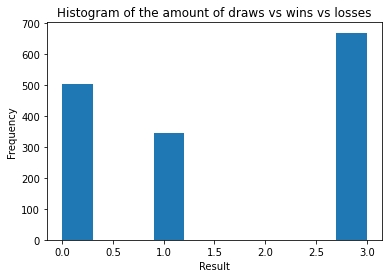

In [ ]:
#histogram of the amount of draws vs wins vs losses
plt.hist(df["Full_Time_Result"])

# label axes
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.title("Histogram of the amount of draws vs wins vs losses")

The Output Above shows the Statistics with the Number of Draws, Wins and Losses of all the Matches played from the 2017 - 2021 season.

1. Losses = 500
2. Draws = 350
3. Wins = 650

## Model Building

## Logistic Regression

The Variables Used in the Logistic Regression will utilise a Training and Test variable.
The Dependant Variables is represented by Y which is the Full Time Result of the Teams and the indipendent Variables are represented by the X axis which are the Name of Home Team, Name of Away Team and the Full Time Result.

In [ ]:
#declare independent and dependent variables, and remove categoric variables
y = df["Full_Time_Result"]
X = df.drop(["Match_Date", "Home_Team", "Away_Team", "Full_Time_Result"], axis=1)

#declare training splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

#standardize the variables using regularization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#data/use softmax regression with ridge regression instead of lasso (because dependent variable has 3 possibilities)
softmax_reg = LogisticRegression(random_state=0, multi_class="multinomial", solver="saga", penalty = 'l2', C = 0.01)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=0.01, multi_class='multinomial', random_state=0,
                   solver='saga')

The Output above shows a coefficient of 0.01

Hence showing that the any increase of the indipendent varaibles leads to a 0.01 increase in the Dependent Variabe.

### Creation of Prediction Variables for the Model

In [ ]:
#create a prediction of y values based on model
y_pred = softmax_reg.predict(X_test)

In [ ]:
#find model accuracy from test data
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.8305921052631579


The Accuracy of the Model ensures a 83.05% hence proving its appropriatness for the Test in this study.

Text(0.5, 1.0, 'Histogram of the predicted results')

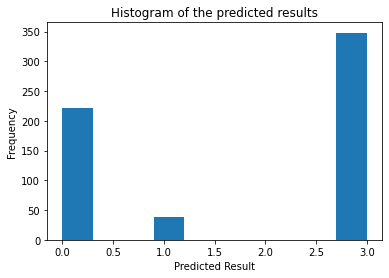

In [ ]:
#plot predicted data
plt.hist(y_pred)

# label axes 
plt.xlabel("Predicted Result")
plt.ylabel("Frequency")
plt.title("Histogram of the predicted results")

The Predicted Result is shown by this Output where the 83.05% of the result represents:

1. around 240 Lost Matches
2. 50 Draws
3. around 340 Won Matches

In [ ]:
#find the worst possible accuracy
baseline_acc = len(y[y == 0]) / len(y) 
print(baseline_acc)

0.33223684210526316


## Finding of the Cohen Score

- This Score is important as it assures the research that the output will be random hence eliminating an aspect of getting a pre determined solution. The study will definatley be proved based on the solution of this.

In [ ]:
#find cohens score; higher score represents less randomness in dataset out of 1
cohens_score = cohen_kappa_score(y_test, y_pred)
print(cohens_score)

0.7265434982904602


The Cohen Score represents a 73% Coeffecient.

This strongly recommends a random value in the solution hence ensuring that the value in the output is definately not pre-determined. 

## Regression Analysis

- The Test Below will Run the Regression Analysis based on the variables and coeeficients calculated above.

In [ ]:
print(softmax_reg.coef_)

[[-0.65905325  0.8173911   0.0170724  -0.0115676 ]
 [-0.23309093 -0.13811307 -0.02042477  0.02223168]
 [ 0.89214418 -0.67927803  0.00335238 -0.01066408]]


Text(0.5, 1.0, 'Feature importance using ridge regression')

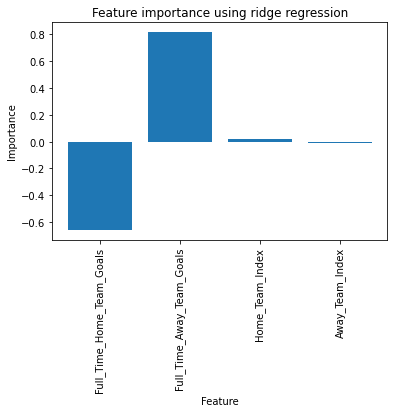

In [ ]:
#create a feature importance bar chart using ridge regression
softmax_importance = range(0, softmax_reg.coef_.shape[1])
plt.bar(x = softmax_importance, height = softmax_reg.coef_[0])
plt.xticks(softmax_importance, X.columns, rotation=90)

# label axes
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importance using ridge regression")

The Output Above states the importance on the variables used in the Model.

1. Full Time Home Goals have a strong negative effect on the overall result, This is represneted by the - 0.6 coeffecient
2. Full Time Away goals has a strong positive effet on the overall result and this is represented with the 0.8 coeffecient.

### Random Forest Approach

The Team Decided to Use the Random Forest Approach Model as the probability for a better analysis was higher.

In [ ]:
#use random forest now to do the same thing as logistic regressionl, see if there are any imporvements
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
baseline_acc = len(y[y == 0]) / len(y) 
cohens_score = cohen_kappa_score(y_test, y_pred)
print(acc_score, baseline_acc, cohens_score)

0.9983552631578947 0.33223684210526316 0.9974687022519391


The Random Approach ensures a cohen coeffecient of 99 % hence the accuracy of the model being more ideal for the study.

In [ ]:
rand_forest.feature_importances_

array([0.48589546, 0.4626253 , 0.02312025, 0.02835899])

Text(0.5, 1.0, 'Feature importance using random forest')

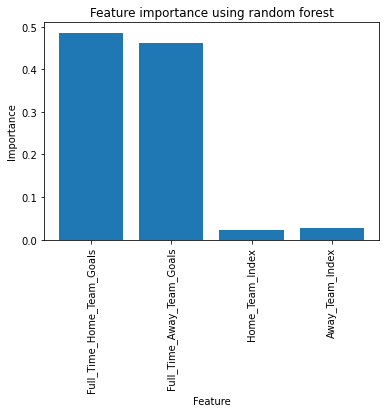

In [ ]:
#create a feature importance bar chart
rand_forest_importance = range(0, len(rand_forest.feature_importances_))
plt.bar(x = rand_forest_importance, height = rand_forest.feature_importances_)
plt.xticks(rand_forest_importance, X.columns, rotation=90)

# label axes
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importance using random forest")

The Output above, shows better prospects for an analysis as the variables explained and used in the model are Full Time Home Goals and Full Time Away Goals which are both critical for the formulation of the final result.

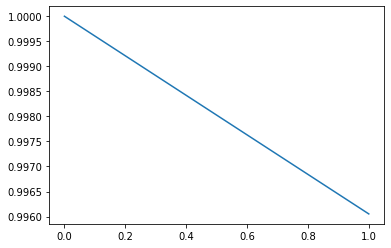

In [ ]:
#use K-folds for cross-validation on the random forest model
fold_perf = []

kf = KFold(n_splits=2, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rand_forest = RandomForestClassifier()
    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    fold_perf.append(acc_score)

plt.plot(fold_perf)

In [ ]:
#create hyperparameters in order to cross-validate the model 
hyperparam_grid = {'n_estimators': [3, 100, 1000],
                   'max_features': [0.05, 0.5, 0.95],
                   'max_depth': [10, 50, 100, None]}

grid_scorer = make_scorer(cohen_kappa_score)
rand_forest = GridSearchCV(RandomForestClassifier(), hyperparam_grid, cv=kf, scoring=grid_scorer)
rand_forest.fit(X, y)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 100, None],
                         'max_features': [0.05, 0.5, 0.95],
                         'n_estimators': [3, 100, 1000]},
             scoring=make_scorer(cohen_kappa_score))

In [ ]:
print(rand_forest.best_score_)
print(rand_forest.best_params_)

0.9979730414513024
{'max_depth': 10, 'max_features': 0.95, 'n_estimators': 100}


In [ ]:
#Used the random forest to predict points for every team at the end of a new season
np.set_printoptions(threshold=np.inf)
model_predictions = rand_forest.predict(X_test)
i = 1
predicted = model_predictions.tolist()
actual = y_test.tolist()
print(predicted)
print(actual)

[3, 0, 1, 3, 1, 0, 3, 1, 0, 3, 3, 0, 1, 3, 3, 0, 1, 3, 1, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 3, 3, 3, 1, 3, 0, 3, 1, 3, 1, 3, 0, 3, 0, 3, 3, 1, 1, 0, 3, 3, 0, 3, 1, 1, 3, 3, 0, 0, 1, 1, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 0, 1, 0, 3, 0, 0, 3, 3, 3, 1, 3, 3, 1, 1, 0, 1, 3, 0, 3, 3, 1, 1, 0, 1, 1, 3, 0, 3, 1, 0, 3, 3, 3, 0, 0, 0, 1, 0, 3, 3, 3, 0, 1, 3, 3, 3, 3, 0, 1, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 0, 3, 3, 3, 1, 1, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 1, 0, 0, 3, 0, 1, 0, 3, 3, 0, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 1, 0, 3, 3, 1, 3, 0, 3, 3, 0, 1, 3, 1, 0, 0, 0, 3, 3, 1, 0, 0, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 0, 3, 1, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 1, 3, 3, 0, 0, 0, 1, 3, 0, 3, 1, 0, 1, 1, 1, 3, 3, 1, 3, 1, 0, 0, 0, 3, 0, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 1, 0, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 1, 3, 0, 1, 1, 3, 0, 0, 3, 0, 1, 3, 1, 3, 3, 1, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 1, 1, 3, 3, 3, 0, 3, 1, 

In [ ]:
print(len(actual))
print(len(predicted))
print(len(y_test))
print(len(X_test))

760
760
760
760


In [ ]:
### DO NOT RE-RUN ###
#comnbine the predictions and the team to find out their points total

predicted_df = X_test
predicted_df['Points'] = predicted
predicted_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Full_Time_Home_Team_Goals,Full_Time_Away_Team_Goals,Home_Team_Index,Away_Team_Index,Points
760,4,1,13,17,3
761,0,5,25,14,0
762,1,1,2,18,1
763,3,0,4,19,3
764,0,0,7,8,1


In [ ]:
print(type(index))
print(index.columns)
print(type(df))
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index(['Home_Team_Index', 'HomeTeam'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
       Full_Time_Home_Team_Goals  Full_Time_Away_Team_Goals  Full_Time_Result  \
count                1520.000000                1520.000000       1520.000000   
mean                    1.492105                   1.236842          1.549342   
std                     1.307271                   1.205303          1.339701   
min                     0.000000                   0.000000          0.000000   
25%                     1.000000                   0.000000          0.000000   
50%                     1.000000                   1.000000          1.000000   
75%                     2.000000                   2.000000          3.000000   
max                     9.000000                   9.000000          3.000000   

       Home_Team_Index  Away_Team_Index  
count      1520.000000      1520.000000  
mean         12.587500        12.587500  
std          

In [ ]:
#sum the points
cleaned_prediction = psql.sqldf("SELECT Home_Team_Index, SUM(Points) as Standing FROM predicted_df GROUP BY Home_Team_Index ORDER BY Standing DESC")
print(cleaned_prediction)

    Home_Team_Index  Standing
0                13        88
1                14        88
2                22        72
3                 6        69
4                15        68
5                12        65
6                 0        64
7                25        56
8                26        56
9                 8        53
10                1        49
11               16        49
12               18        49
13               19        48
14                4        46
15                7        46
16                3        43
17               11        29
18               23        24
19                2        21
20               17        15
21               24        15
22                9        10


In [ ]:
#final predicions table
bindi = pd.DataFrame(index)
final_prediction = psql.sqldf("SELECT b.HomeTeam, Standing FROM cleaned_prediction c LEFT OUTER JOIN bindi b ON c.Home_Team_Index = b.Home_Team_Index ORDER BY Standing DESC")

final_prediction.head(20)


,HomeTeam,Standing
0,Liverpool,88
1,Man City,88
2,Tottenham,72
3,Chelsea,69
4,Man United,68
5,Leicester,65
6,Arsenal,64
7,West Ham,56
8,Wolves,56
9,Everton,53


Manchester City and Liverpool are likely to have the same points in the 2022-2023 Premier League. This Conclusion is Based on the Amount of Points Collected and shown by the Prediction Analysis.

The Output However shows Liverpool as the Winner, This could be well explained by the Goals Scored Variables that was used by the Modeller during building of the Analysis.

